In [1]:
from scipy.optimize  import curve_fit, fsolve
from scipy.special   import erf, betainc, gamma

from ROOT import TFile,TMVA,TH2F, TCanvas,TTree
import array, sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

from root_pandas import read_root

Welcome to JupyROOT 6.18/04


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/root_numpy/__init__.py:34: RuntimeWarning: ROOT 6.18/04 is currently active but you installed root_numpy against ROOT 6.05/02. Please consider reinstalling root_numpy for this ROOT version.
  RuntimeWarning)
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.15.0 is currently installed but you installed root_numpy against numpy 1.12.1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
# My Dependencies
from Samples.Data      import Data
from Plotter.Helper    import Helper
from Plotter.Plotter   import Plotter
from Cuts.Cuts         import Cuts

In [3]:
import os, datetime
from time import time

In [4]:
def dirStructure(figpath):
    date = datetime.datetime.now()
    fileName = str(date.year) + str(date.month) + str(date.day) + "/"
    
    try:
        os.mkdir(figpath+fileName)    
    except:
        print("Directory "+fileName+ " already exist")
        
    try :
        os.mkdir(figpath+fileName+'ShowerShapeMVA/')
    except:
        print("Directory "+fileName+'ShowerShapeMVA/ already exist')
    
    dirSubStructure(figpath + fileName + "Stacked/")
    dirSubStructure(figpath + fileName + "Unstacked/")
    
    dirSubStructure(figpath + fileName + "nJets/")
    for i in range(5):
        dirSubStructure(figpath + fileName + "nJets/Stacked_nJets"+str(i)+"/")
        dirSubStructure(figpath + fileName + "nJets/Unstacked_nJets"+str(i)+"/")
    
    return figpath+fileName  

def dirSubStructure(path):
    try:
        os.mkdir(path)
    except:
        print("Subdirectory for " + path + " already exists or failed.")
    
    try:
        os.mkdir(path+"log")
        os.mkdir(path+"log/Mult")
        os.mkdir(path+"linear")
        os.mkdir(path+"linear/Mult")
    except:
        print("Subdirectory for " + path + " already exists or failed.")

In [5]:
selection = 'mumug'
#selection = 'elelg'
#selection = 'ee'

#era = "2016"
#era = "2017"
era = "2018"

if   era == "2016":
    run = ['B','C','D','E','F','G','H']
    #DataGen = 'rereco'
    DataGen = 'legacy'
    if DataGen == 'legacy':
        #SampleSet = 'MatchZGpaper'
        #SampleSet = 'Rerun'
        SampleSet = 'Correction'
    else:
        SampleSet = 'MatchZGpaper_newAna'
elif era == "2017":
    if selection == "mumug":
        run = ['B','C','D','E','F']
        DataGen = 'rereco'
        #SampleSet = 'V1'
        #SampleSet = 'V2_puWeight'
        #SampleSet = 'V2_puWeight_phID'
        #SampleSet = "V4_phID_isConv"
        #SampleSet = "V4_phID_isConv_MINUIT"
        #SampleSet  = "V5_mediumID"
        #SampleSet  = "V6_lPhoton"
        SampleSet  = "V6_Accept"
        
        LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'genPhotonFHPFS','genPhotonIPFS',
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR','l1PhotonM','l1PhotonPt',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR','l2PhotonM','l2PhotonPt',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets','nBJets',
            'passElectronVeto',
            ]          
    elif selection == "mumu":
        run = ['B','C','D','E','F']
        DataGen = 'rereco'
        #SampleSet = 'V1'
        #SampleSet = 'V2_puWeight'
        SampleSet = 'V2_puWeight_phID'
        
        LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'genPhotonFHPFS','genPhotonIPFS',
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR','l1PhotonM','l1PhotonPt',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR','l2PhotonM','l2PhotonPt',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets','nBJets',
            'passElectronVeto',
            ]        
    elif selection == "ee":
        run = ['B','C','D','E','F']
        #run = ['D']
        DataGen = 'rereco'
        #SampleSet = 'EfficiencyCorrection/files_zee/CorrShower'
        SampleSet = 'EfficiencyCorrection/files_zee/V4_phID_isConv'
        
        LoadVars = [
                    #'runNumber','evtNumber',
                    'nPV',
                    'nPU',

                    #'genWeight',
                    'eventWeight','puWeight',
                    #'triggerWeight','photonIDWeight',
                    'photonOneEta',
                    #'leptonOneCharge','leptonTwoCharge',
                    #'photonOneMVA',
                    #'photonOneERes',

                    ############################# 

                    #'photonOneR9',
                    'photonOneSieie',
                    #'photonOneHoverE',

                    #'photonOneIneu','photonOneIph','photonOneIch',
                    #'photonOneSieip',
                    #'photonOneSipip',
                    #'photonOneSrr',
                    #'photonOneE2x2',
                    #'photonOneE5x5',
                    #'photonOneScEtaWidth',
                    #'photonOneScPhiWidth',
                    #'photonOneScRawE',
                    #'photonOnePhi',
                    #'photonOnePreShowerE',
                    #'photonOneScBrem',
                    #'Rho',
                    ##############################
                    #'genPhotonPt',
                    #'vetoDY',
                    #'genIsoPass',
                    #'passElectronVeto',
                    'ProbeIDPass','ProbeWorstPass',
                    ]
elif era == "2018":
    if selection == "mumug":
        run = ['A','B','C','D']
        DataGen = 'rereco'
        #SampleSet = 'V1_trigBits'
        SampleSet = 'V2_trigBits_pu'
        
        LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'genPhotonFHPFS','genPhotonIPFS',
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR','l1PhotonM','l1PhotonPt',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR','l2PhotonM','l2PhotonPt',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets','nBJets',
            'passElectronVeto',
            ] 
    elif selection == "elelg":
        run = ['A','B','C','D']
        DataGen = 'rereco'
        SampleSet = 'V1_trigBits'
        
        LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'genPhotonFHPFS','genPhotonIPFS',
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR','l1PhotonM','l1PhotonPt',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR','l2PhotonM','l2PhotonPt',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets','nBJets',
            'passElectronVeto',
            ]          
    elif selection == "mumu":
        run = ['A','B','C','D']
        DataGen = 'rereco'
        SampleSet = 'V1_trigBits'
        
        LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'genPhotonFHPFS','genPhotonIPFS',
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR','l1PhotonM','l1PhotonPt',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR','l2PhotonM','l2PhotonPt',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets','nBJets',
            'passElectronVeto',
            ]        
    elif selection == "ee":
        run = ['A','B','C','D']
        DataGen = 'rereco'
        #SampleSet = 'V1_trigBits'
        #SampleSet = 'EfficiencyCorrection/files_zee/CorrShower'
        SampleSet = 'EfficiencyCorrection/files_zee/V4_phID_isConv'
        
        LoadVars = [
                    #'runNumber','evtNumber',
                    'nPV',
                    'nPU',

                    #'genWeight',
                    'eventWeight','puWeight',
                    #'triggerWeight','photonIDWeight',
                    'photonOneEta',
                    #'leptonOneCharge','leptonTwoCharge',
                    #'photonOneMVA',
                    #'photonOneERes',

                    ############################# 

                    #'photonOneR9',
                    'photonOneSieie',
                    #'photonOneHoverE',

                    #'photonOneIneu','photonOneIph','photonOneIch',
                    #'photonOneSieip',
                    #'photonOneSipip',
                    #'photonOneSrr',
                    #'photonOneE2x2',
                    #'photonOneE5x5',
                    #'photonOneScEtaWidth',
                    #'photonOneScPhiWidth',
                    #'photonOneScRawE',
                    #'photonOnePhi',
                    #'photonOnePreShowerE',
                    #'photonOneScBrem',
                    #'Rho',
                    ##############################
                    #'genPhotonPt',
                    #'vetoDY',
                    #'genIsoPass',
                    #'passElectronVeto',
                    'ProbeIDPass','ProbeWorstPass',
                    ] 
    
pathMVA = "/home/jcordero/CMS/data_"+era+"/"+DataGen+"/SMP_ZG/Files/ShowerShapeMVA/"
path    = "/home/jcordero/CMS/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/"
figpath = "/home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/"+era+"/"+DataGen+"/"+selection+"/"
pathSelections = "/home/jcordero/CMS/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/Reduced"

figpath = dirStructure(figpath)   


Help    = Helper(era)

Help.SetPath(path)
Help.figpath = figpath

Plotter = Plotter(Help=Help)
Plotter.SetFig(Help.figpath)

Cut = Cuts(path = Help.path)


Directory 2020331/ already exist
Directory 2020331/ShowerShapeMVA/ already exist
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/Stacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/Stacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/Unstacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/Unstacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/nJets/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/nJets/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/nJets/Stacked_nJets0/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2018/rereco/mumug/2020331/nJets

Error in <TFile::TFile>: file output__0.root does not exist


In [6]:
#TestPlot = True
TestPlot = False
if TestPlot:
    Plotter.Plot(
                 data= [Plotter.Test,Plotter.Test,Plotter.Test],
                 var              = 'test',
                 part             = '',
                 signalInclude    = True,
                 stacked          = True,
                 density          = False,
                 log              = False,
                 weightCorrection = False,
                 Plotting         = False,
                 Blind            = False,
                 StatInclude      = False,
                 CustomeRangeBins = [],
                 CustomeSettings  = False,
                 Print            = True,
                 index            = 'test',
                );

In [7]:

# --------------------------------------
#  Data
# ---------------------------------------
if selection   == 'mumug':
    DoubleLepton = [Data(path+"DoubleMuon/","DoubleMuon_"+era,trigger = r,era = era,data=True, var = LoadVars) for r in run]
elif selection == 'elelg':
    DoubleLepton = [Data(path+"DoubleEG/","DoubleEG_"+era,trigger = r,era = era, data=True, var = LoadVars) for r in run]
elif selection == 'ee':
    #SingleLepton = [Data(path+"SingleElectron/","Electron_"+era,trigger = r,era = era, data=True, var = LoadVars) for r in run]
    #SingleLepton = [Data(path+"SingleElectron/","Electron_"+era,trigger = r,era = '2017_RunD', data=True, var = LoadVars) for r in run]
    #SingleLepton = [Data(path+"SingleElectron/","Electron_"+era,trigger = r,era = '2017_Run'+r, data=True) for r in run]
    SingleLepton = [Data(path+"SingleElectron/","Electron_"+era,trigger = 'D',era = '2017_RunD', data=True, var = LoadVars)]

#################################
if selection == 'mumug' or selection == 'elelg':
    Leptons = DoubleLepton[0]
    for i in np.arange(len(DoubleLepton[1:])):
        Leptons =   Leptons + DoubleLepton[1]
        del DoubleLepton[1]    
elif selection == 'ee':
    Leptons = SingleLepton[0]
    for i in np.arange(len(SingleLepton[1:])):
        Leptons =   Leptons + SingleLepton[1]
        del SingleLepton[1]    

----------------- DATA --------------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/DoubleMuon/output_DoubleMuon_2018A_v.root
Opening    tree::   tree_DoubleMuon_2018A
-------------------------------------------------
----------------- DATA --------------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/DoubleMuon/output_DoubleMuon_2018B_v.root
Opening    tree::   tree_DoubleMuon_2018B
-------------------------------------------------
----------------- DATA --------------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/DoubleMuon/output_DoubleMuon_2018C_v.root
Opening    tree::   tree_DoubleMuon_2018C
-------------------------------------------------
----------------- DATA --------------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/DoubleMuon/output_DoubleMuon_2018D_v.root
Opening 

Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist


In [8]:
if selection == "mumug" or selection == "elelg":
    trigger    = "_v"
    DYJets     = Data(path +      "DYJets/",     "DYJets", trigger, era = era, var = LoadVars)
    
    if DataGen == "legacy" or era == '2017' or era == '2018':
        ZG     = Data(path +   "ZGToLLG/",   "ZGToLLG", trigger, era = era, var = LoadVars)
        WJets  = Data(path +     "WJets/",     "WJets", trigger, era = era, var = LoadVars)
        TT     = Data(path + "TTTo2L2Nu/", "TTTo2L2Nu", trigger, era = era, var = LoadVars)
    elif DataGen == "rereco":
        ZG     = Data(path +    "ZG_ZToLL/",   "ZG_ZToLL", trigger, era = era, var = LoadVars)
        TT     = Data(path +          "TT/",         "TT", trigger, era = era, var = LoadVars)
        W1Jets = Data(path + "W1JetsToLNu/","W1JetsToLNu", trigger, era = era, var = LoadVars)
        W2Jets = Data(path + "W2JetsToLNu/","W2JetsToLNu", trigger, era = era, var = LoadVars)
        W3Jets = Data(path + "W2JetsToLNu/","W3JetsToLNu", trigger, era = era, var = LoadVars)
        W4Jets = Data(path + "W3JetsToLNu/","W4JetsToLNu", trigger, era = era, var = LoadVars)

    WWTo2L2Nu  = Data(path +   "WWTo2L2Nu/",  "WWTo2L2Nu", trigger, era = era, var = LoadVars)

    ZZTo2L2Nu  = Data(path +   "ZZTo2L2Nu/",  "ZZTo2L2Nu", trigger, era = era, var = LoadVars)
    ZZTo2L2Q   = Data(path +    "ZZTo2L2Q/",   "ZZTo2L2Q", trigger, era = era, var = LoadVars)
    ZZTo4L     = Data(path +      "ZZTo4L/",     "ZZTo4L", trigger, era = era, var = LoadVars)

    WZTo2L2Q   = Data(path +    "WZTo2L2Q/",   "WZTo2L2Q", trigger, era = era, var = LoadVars)
    WZTo3LNu   = Data(path +    "WZTo3LNu/",   "WZTo3LNu", trigger, era = era, var = LoadVars)
elif selection == "ee":
    trigger    = "_v"
    DYJets     = Data(path +      "DYJets/",     "DYJets", trigger, era = era, var = LoadVars)
    if DataGen == "legacy" or era == '2017':
        ZG     = Data(path +   "ZGToLLG/",   "ZGToLLG", trigger, era = era, var = LoadVars)
    elif DataGen == "rereco":
        ZG     = Data(path +    "ZG_ZToLL/",   "ZG_ZToLL", trigger, era = era, var = LoadVars)
    WJets  = Data(path +     "WJets/",     "WJets", trigger, era = era, var = LoadVars)
    TT     = Data(path + "TTTo2L2Nu/", "TTTo2L2Nu", trigger, era = era, var = LoadVars)


-------------------- MC -----------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/DYJets/output_DYJets_v_0.root
Opening    tree::   tree_dyjets
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/ZGToLLG/output_ZGToLLG_v_0.root
Opening    tree::   tree_zgtollg
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/WJets/output_WJets_v_0.root
Opening    tree::   tree_wjets
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::/home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/TTTo2L2Nu/output_TTTo2L2Nu_v_0.root
Opening    tree::   tree_ttto2l2nu
-----------------------------------------------
-----------

Error in <TFile::TFile>: file /home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/WWTo2L2Nu/output_WWTo2L2Nu_v_0.root does not exist
Error in <TFile::TFile>: file /home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/ZZTo2L2Nu/output_ZZTo2L2Nu_v_0.root does not exist
Error in <TFile::TFile>: file /home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/ZZTo2L2Q/output_ZZTo2L2Q_v_0.root does not exist
Error in <TFile::TFile>: file /home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/WZTo2L2Q/output_WZTo2L2Q_v_0.root does not exist
Error in <TFile::TFile>: file /home/jcordero/CMS/data_2018/rereco/SMP_ZG/Files/mumug/V2_trigBits_pu/WZTo3LNu/output_WZTo3LNu_v_0.root does not exist


In [9]:
if selection != "ee":  
    print(' +++ Merging MC Samples')
    if DataGen == "rereco" and era == "2016":
        WJets = W1Jets + W2Jets + W3Jets + W3Jets

    WW = WWTo2L2Nu
    ZZ = ZZTo2L2Nu + ZZTo2L2Q + ZZTo4L
    WZ = WZTo2L2Q + WZTo3LNu

    VV = WWTo2L2Nu + ZZTo2L2Nu + ZZTo2L2Q + ZZTo4L + WZTo2L2Q + WZTo3LNu
    
    #del ZZTo2L2Nu, ZZTo2L2Q, ZZTo4L, WWTo2L2Nu, WZTo2L2Q, WZTo3LNu
    print('--Done')

 +++ Merging MC Samples
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
-----------------------------------------------
-------------------- MC -----------------------
Open

Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist


In [10]:
if selection == "mumug" or selection == "eleg":  
    data  = [            WJets,             VV,           TT,   DYJets,        ZG, Leptons]
    data, legend, colors, dataFlag = Help.SetDataOpt(data,selection = selection,exclude = [''])

    Plotter.SetPlotOpt(legend=legend,colors = colors)
elif selection == "ee":
    #data  = [            WJets,           TT,   DYJets,        ZG, Leptons]
    data  = [            WJets,           TT,   DYJets, Leptons]
    data, legend, colors, dataFlag = Help.SetDataOpt(data,selection = selection,exclude = [''])

    #colors = ['cornflowerblue','lightskyblue','lightcoral','plum','pink','k']
    colors = ['cornflowerblue','lightcoral','plum','k']
    
    Plotter.SetPlotOpt(legend=legend,colors = colors)

0 WJets cornflowerblue
1 WWTo2L2Nu lightskyblue
2 TTTo2L2Nu lightcoral
3 DYJets plum
4 ZGToLLG pink
5 DoubleMuon_2018 k


In [ ]:
################################
#stacked = False
stacked = True

LOG = 'both'
log = False
#log = True

#phType = 'ISR'
#phType = 'FSR'
phType = ''


ShowerShapeCorrection = True
#ShowerShapeCorrection = False

if selection == "mumug" or selection == "elelg":
    lgmDR = True
elif selection == "ee":
    lgmDR = False

################

#Region = ''

#Region = 'A'
#Region = 'B'
#Region = 'C'
#Region = 'D'

#Region = 'Ap'
#Region = 'Bp'
#Region = 'Cp'
Region = 'Dp'


#Region = 'AB'
#Region = 'CD'

#Region = 'Sig'
#Region = 'Inv Sig'

#Region = 'Sideband'
#Region = 'Compare'


#Region = ['Sig','IPFS']
#Region = ['Sig','noIPFS']
#Region = ['Inv Sig','IPFS']
#Region = ['Inv Sig','noIPFS']

################

#Charge = 'oposite'
#Charge = 'same'
Charge = ''

#customRange = True
customRange = False

weightCorrection = True
#weightCorrection = False

#StatInclude = False
StatInclude = True

MVA = False
#MVA = True

Print = False
#Print = True

vetoDY = True
#vetoDY = False

###############################
if stacked:
    Fol  = 'Stacked'
    stackLab  = ''
    histtype  = 'stepfilled'
    density   = False
    linewidth = 1
else:
    Fol  = 'Unstacked'
    stackLab  = ''
    histtype  = 'step'
    density   = True
    #density = False
    linewidth = 1.7
###############################    
if log:
    stackFol = Fol+'/log'
else:
    stackFol = Fol+'/linear'
###############################

######## CUTS ##############
Cut.PhaseSpace(
                data,
                phType = phType,
                Charge = Charge,
                Region = Region,
                Print  = Print,
                vetoDY = vetoDY,
                lgmDR  = lgmDR,
                MVA    = MVA,
              )

for d in data[:-1]:
    if not d.df.empty:
        d.AddCuts(np.array(d.df.nPU) > 0) 
        
#for d in data[:-1]:
#    if not d.df.empty:
#        d.AddCuts(np.array(d.df.photonOnePt) > 100)
###############################

In [89]:
      
def Multi_Ploting(
                  data,
                  stacked,
                  log,
                  customRange      = False,
                  weightCorrection = True,
                  Blind            = True,
                  Plotting         = True,
                  StatInclude      = False,
                 ):
    #################################################################
    var = ['Pt','Phi']
    part = ['leptonOne','leptonTwo','photonOne','dilepton','llg']
    part = [p+'_EE' for p in part]

    for v in var:

        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [2,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )
        
    #################################################################
    var = ['Pt','Phi']
    part = ['leptonOne','leptonTwo','photonOne','dilepton','llg']
    part = [p+'_EB' for p in part]

    for v in var:

        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [2,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )
    #################################################################
    var = ['DEta','DPhi','DR']
    part = ['l1Photon','l1Photon_EE','l1Photon_EB','l2Photon','l2Photon_EE','l2Photon_EB','dileptonPhoton','dileptonPhoton_EE','dileptonPhoton_EB','dilepton']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [4,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )    
    #################################################################
    var = ['HoverE','R9','MVA']#,'eres']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [3,1],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )
    #################################################################
    var = ['Ich','Ineu','Iph']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,            
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [3,1],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )
    #################################################################
    var = ['M']    
    part = ['dilepton','dilepton_EE','dilepton_EB','llg','llg_EE','llg_EB']
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,            
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [2,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )
    #################################################################        
    var = ['Srr','Sipip','Sieip','Sieie']
    part = ['photonOne','photonOne_EE','photonOne_EB'] 
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,            
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [1,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )
    #################################################################
    var = ['E2x2','E5x5','PreShowerE']
    part = ['photonOne','photonOne_EE','photonOne_EB']  
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [1,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )
    #################################################################
    var = ['ScEtaWidth','ScPhiWidth','ScRawE','ScBrem']
    part = ['photonOne','photonOne_EE','photonOne_EB']  
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                  data,            
                  var              = v,
                  part             = part,
                  signalInclude    = True,
                  figDim           = [1,3],
                  customRange      = customRange,
                  stacked          = stacked,
                  log              = log,
                  weightCorrection = weightCorrection,
                  Plotting         = Plotting,
                  StatInclude      = StatInclude,
                 )        

In [38]:
Multi_Ploting(data,
              stacked,
              log              = True,
              customRange      = False,
              weightCorrection = False,
              Blind            = True,
              Plotting         = True,
              StatInclude      = True,
              )


----------------Pt----------------
Just set plot param legend.loc empty


/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Plotter.py:169: RuntimeWarning: invalid value encountered in less
  Yield.append(np.sum(wei[i][np.array(data[i].GetWithCuts(part+var+ph)) < bins[-1] ]))
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Helper.py:1512: RuntimeWarning: invalid value encountered in greater
  Ind = np.logical_and(data[i].GetWithCuts(variable) > bins[j], data[i].GetWithCuts(variable) <= bins[j+1])
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Helper.py:1512: RuntimeWarning: invalid value encountered in less_equal
  Ind = np.logical_and(data[i].GetWithCuts(variable) > bins[j], data[i].GetWithCuts(variable) <= bins[j+1])
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Helper.py:1478: RuntimeWarning: invalid value encountered in sqrt
  statUn = np.sqrt(counts)
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Plotter.py:819: RuntimeWarning: invalid value encountered in true_divide
  rDataMC = Data[1]/Bkg
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Plotte

KeyboardInterrupt: 

In [ ]:
def Plot_Mult(
                  data,
                  var,
                  part,
                  signalInclude    = False,
                  figDim           = [2,3],
                  customRange      = False,
                  stacked          = True,
                  density          = False,
                  log              = False,
                  weightCorrection = True,
                  externalData     = None,
                  Blind            = True,
                  Plotting         = True,
                  StatInclude      = False,
                  index            = 0,
                 ):

        Plotter.PlotSettings(Single=False)



        nx,ny = figDim[0],figDim[1]
        rowSpan,colSpan = 3,1

        ##########################
        if not signalInclude:
            N = 2
        else:
            N = 1
        ##########################
        if stacked:
            histtype = 'stepfilled'
        else:
            histtype = 'step'
        ##########################

        htemp = []
        row,col =0 , 0


        fig = plt.figure(figsize = (6*ny, 6*nx))

        for j,k in zip(range(len(part)),part): 
            
            p,v,ph = Plotter.NamingFormat(k,var)

            ##########################

            ranges,bins = Plotter.Help.GET_RangeBins(p,v,ph, Blind=False,Plotting=Plotting)
            wei, VAR    = Plotter.Help.GET_WeiVAR(data, p,v,ph, 
                                               weightCorrection = weightCorrection,
                                              )
            label = Plotter.LabeledYields(data,part=p,var=v,ph=ph,wei=wei,ranges=ranges,bins=bins)

            ##########################

            nx,ny = figDim[0],figDim[1]

            if j != 0:
                if j%ny == 0:
                    row += 1
                    col = 0  

            ax = plt.subplot2grid((nx*(rowSpan+1),ny),(row*(rowSpan+1),col),rowspan = rowSpan, colspan = colSpan)    
            title_lab = k        




            h_bg = ax.hist(
                            VAR[:-N],                            
                            histtype  = histtype,
                            range     = ranges,
                            bins      = bins,
                            stacked   = stacked,
                            color     = Plotter.colors[:-N],
                            weights   = wei[:-N],
                            label     = label,
                            density   = density,
                            linewidth = Plotter.linewidth,
                            )
            htemp.append(h_bg)
            ax.set_title(title_lab)
            ax.grid(linestyle='--')
            ax.legend(prop={'size':10})
            

            #----------------------------------------------------------------
            #----------------------------------------------------------------
            if stacked:
                if not signalInclude:
                    h_sig = ax.hist(
                                    VAR[-N],
                                    bins      = bins,
                                    range     = ranges,
                                    histtype  = Help.plotOpsAll[-N]['histtype'],
                                    stacked   = Help.plotOpsAll[-N]['stacked'],
                                    color     = Plotter.colors[-N],
                                    weights   = wei[-N],
                                    label     = label[-N] ,
                                    linewidth = Plotter.linewidth+1,
                                    )
                    ax.legend(prop={'size': 10})
                else:
                    h_sig = h_bg[0][-1]

                if type(bins) is float or type(bins) is int:
                    step = (ranges[1]-ranges[0])/bins
                    bins = np.array([ranges[0]+i*step for i in np.arange(bins+1)])   

                ax = plt.gca()
                if StatInclude:
                    x,value,statUp,statDown = Plotter.Help.GET_StatUncertainty(data = data, hist = h_bg[0], part=p,var=v,ph=ph, bins = h_bg[1])
                    ax.fill_between(x,value-statDown,value+statUp,facecolor='lightgrey',color = 'grey',hatch='/////',alpha=0.6,label='MC stat')


                #---------------------
                #---- Ploting the Data    
                #---------------------
                # Blind the data Plot
                ranges,bins = Plotter.Help.GET_RangeBins(p,v,ph,Blind=Blind,Plotting=Plotting)

                x3,y3,x3b,xlim = Plotter.PlotData(ax,VAR[-1],ranges,bins,log)


                #------------------------
                #---- Ploting the Data/MC    
                #-------------------------
                
                
                ax.xaxis.labelpad = 0
                ax.yaxis.labelpad = 4
                
                ax1 = plt.subplot2grid((nx*(rowSpan+1),ny),(row*(rowSpan+1)+3,col),
                                       rowspan = 1, colspan = colSpan,
                                       sharex = ax
                                      )    

                # Data/MC  y-RANGE
                ylim = [0.5,1.5]
                try:
                    Plotter.PlotDataMC(ax1,
                           lims    = [xlim, ylim],
                           Data    = [x3b, y3],
                           Bkg     = h_bg[0][-1],
                           Sig     = h_sig[0],
                           ranges  = ranges,
                           bins    = bins,
                          )
                except:
                    Plotter.PlotDataMC(ax1,
                           lims    = [xlim, ylim],
                           Data    = [x3b, y3],
                           Bkg     = h_bg[0],
                           Sig     = h_sig[0],
                           ranges  = ranges,
                           bins    = bins,
                          )

            col+=1
            if log:
                ax.set_yscale('log')
            ax1.set_title(None)
            ax1.set_xlabel(None)
            ax1.set_xlabel(v)
            
            
            

            #########################################################

        
        #fig.tight_layout()
        #fig.subplots_adjust(top=0.4)
        
        plt.show()


----------------Pt----------------


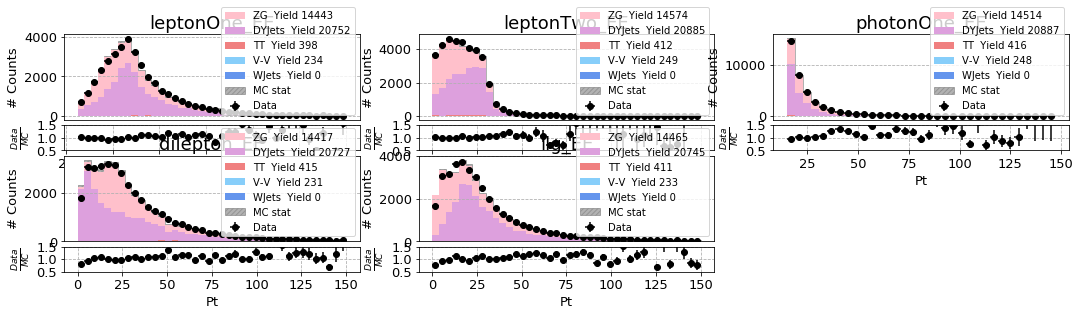

----------------Phi----------------


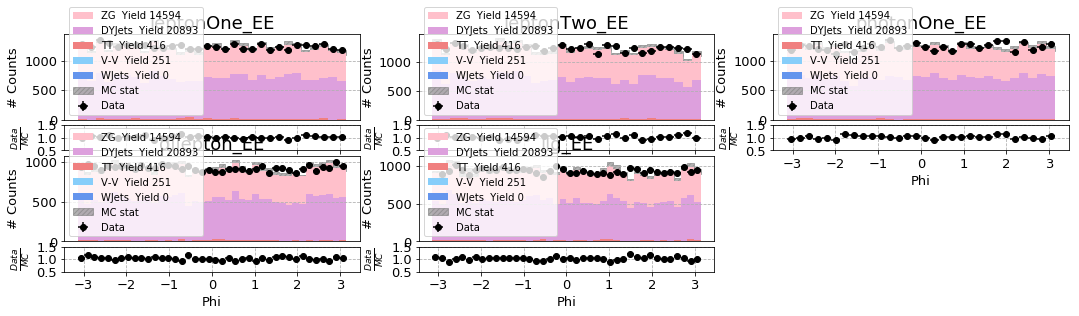

In [62]:
#################################################################
var = ['Pt','Phi']
part = ['leptonOne','leptonTwo','photonOne','dilepton','llg']
part = [p+'_EE' for p in part]

for v in var:

    print('----------------'+str(v)+'----------------')
    Plot_Mult(
              data,
              var              = v,
              part             = part,
              signalInclude    = True,
              figDim           = [2,3],
              customRange      = customRange,
              stacked          = stacked,
              log              = log,
              weightCorrection = weightCorrection,
              Plotting         = True,
              StatInclude      = StatInclude,
             )

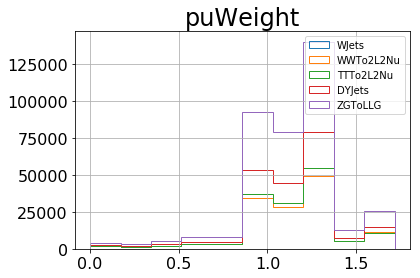

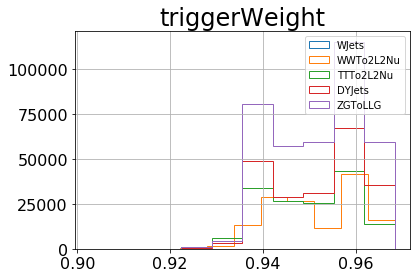

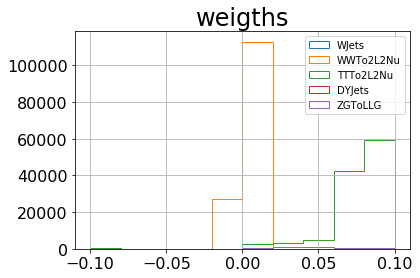

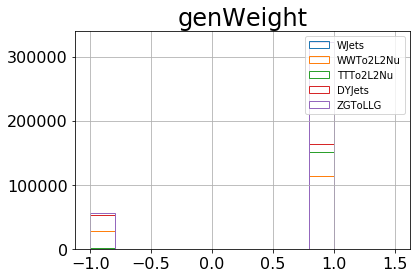

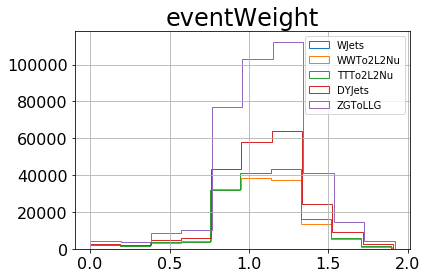

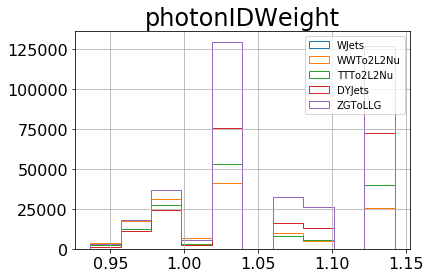

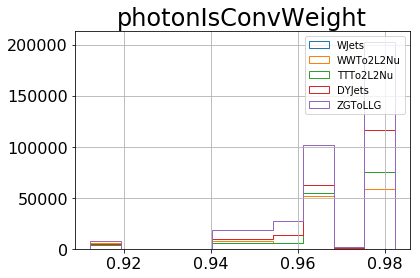

In [16]:
var = 'puWeight'
plt.figure()
plt.title(var)
for d in data[:-1]:
    plt.hist(
             getattr(d.df,var) ,
             histtype = 'step',
             label = d.name,
            )
plt.legend()

var = 'triggerWeight'
plt.figure()
plt.title(var)
for d in data[:-1]:
    plt.hist(
             getattr(d.df,var) ,
             histtype = 'step',
             label = d.name,
            )
plt.legend()





plt.figure()
var = 'weights'
plt.title('weigths')
for d in data[:-1]:
    plt.hist(getattr(d,var),
             histtype = 'step',
                range = [-0.1,0.1],
             label = d.name,
            )
plt.legend()


var = 'genWeight'
plt.figure()
plt.title(var)
for d in data[:-1]:
    plt.hist(
             getattr(d.df,var) ,
             histtype = 'step',
             label = d.name,
            )
plt.legend()

var = 'eventWeight'
plt.figure()
plt.title(var)
for d in data[:-1]:
    plt.hist(
             getattr(d.df,var) ,
             histtype = 'step',
             label = d.name,
            )
plt.legend()

var = 'photonIDWeight'
plt.figure()
plt.title(var)
for d in data[:-1]:
    plt.hist(
             getattr(d.df,var) ,
             histtype = 'step',
             label = d.name,
            )
plt.legend()

var = 'photonIsConvWeight'
plt.figure()
plt.title(var)
for d in data[:-1]:
    plt.hist(
             getattr(d.df,var) ,
             histtype = 'step',
             label = d.name,
            )
plt.legend()





#([self.ScaleFactor(era) for _ in range(self.sampLength)]))

In [15]:
Print = False

# Test Plot

/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Helper.py:1478: RuntimeWarning: invalid value encountered in sqrt
  statUn = np.sqrt(counts)
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Plotter.py:818: RuntimeWarning: divide by zero encountered in true_divide
  rDataMC = Data[1]/Bkg
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Plotter.py:818: RuntimeWarning: invalid value encountered in true_divide
  rDataMC = Data[1]/Bkg
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Plotter.py:832: RuntimeWarning: divide by zero encountered in true_divide
  errDataMC = Data[1]/h*np.sqrt(1/Data[1]+1/h)
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Plotter.py:832: RuntimeWarning: invalid value encountered in true_divide
  errDataMC = Data[1]/h*np.sqrt(1/Data[1]+1/h)
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Plotter.py:832: RuntimeWarning: invalid value encountered in sqrt
  errDataMC = Data[1]/h*np.sqrt(1/Data[1]+1/h)
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Plotter.py:832:

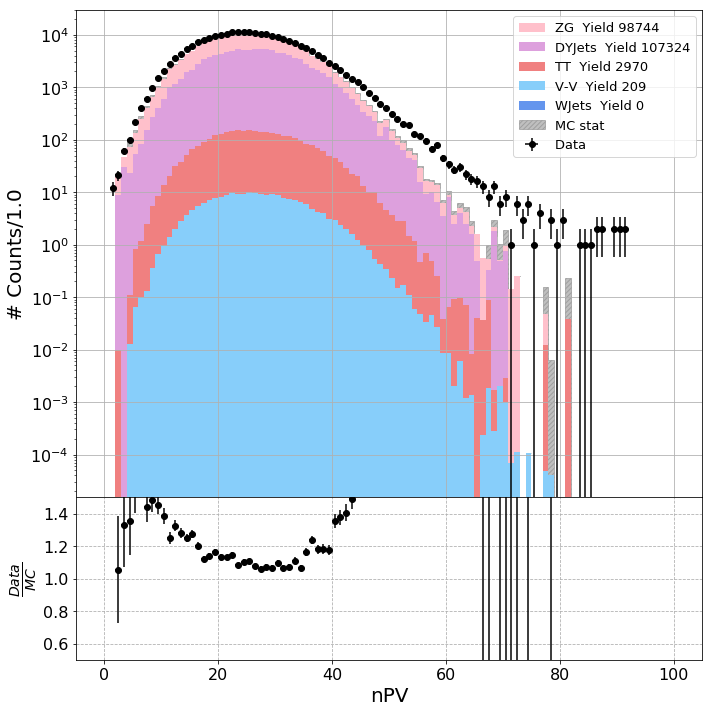

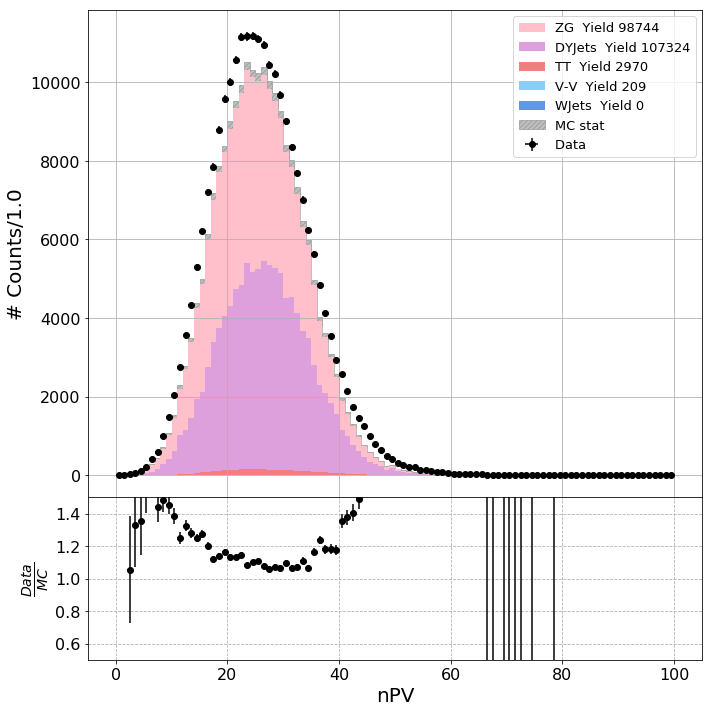

In [12]:
for log in [True,False]:
    for v in ['nPV']:
        for p in ['']:
            Plotter.Plot(
                         data,
                         var              = v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = True,
                         density          = False,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Plotting         = True,
                         Blind            = True,
                         StatInclude      = StatInclude,
                         CustomeRangeBins = [],
                         Print            = Print,
                         index            = Region+'_'+phType,
                        );

/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Plotter.py:169: RuntimeWarning: invalid value encountered in less
  Yield.append(np.sum(wei[i][np.array(data[i].GetWithCuts(part+var+ph)) < bins[-1] ]))
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Helper.py:1512: RuntimeWarning: invalid value encountered in greater
  Ind = np.logical_and(data[i].GetWithCuts(variable) > bins[j], data[i].GetWithCuts(variable) <= bins[j+1])
/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Plotter/Helper.py:1512: RuntimeWarning: invalid value encountered in less_equal
  Ind = np.logical_and(data[i].GetWithCuts(variable) > bins[j], data[i].GetWithCuts(variable) <= bins[j+1])


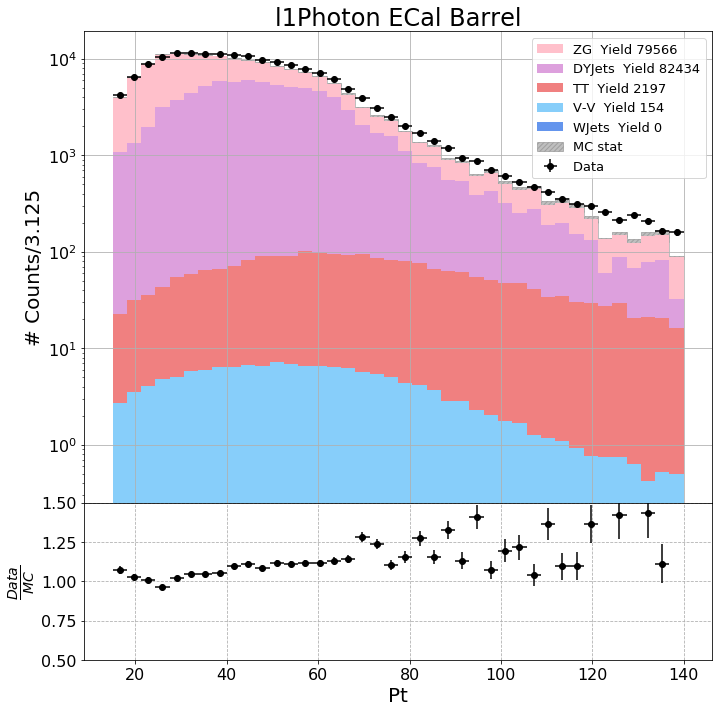

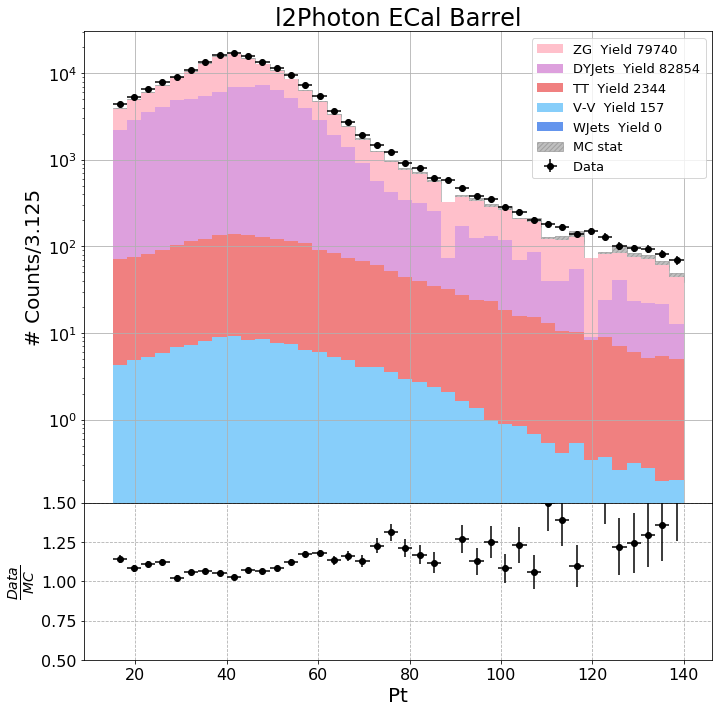

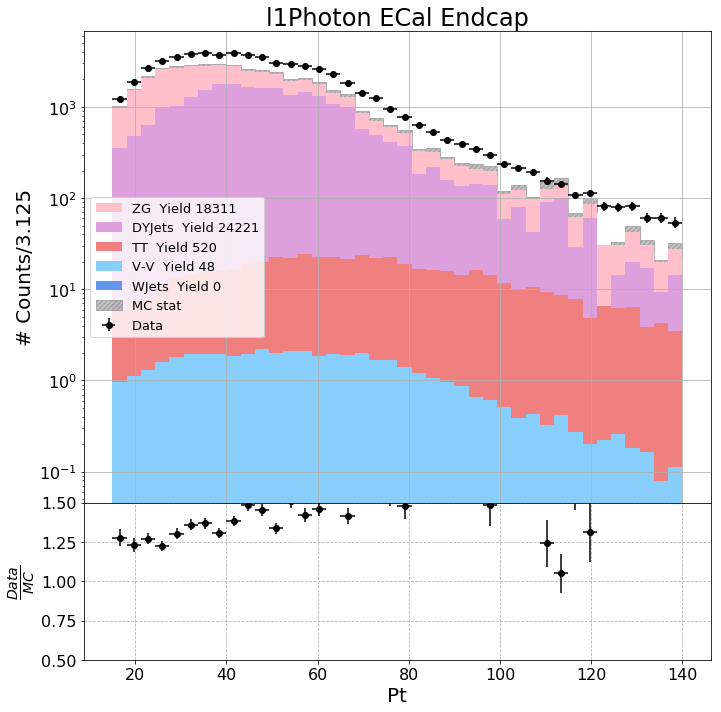

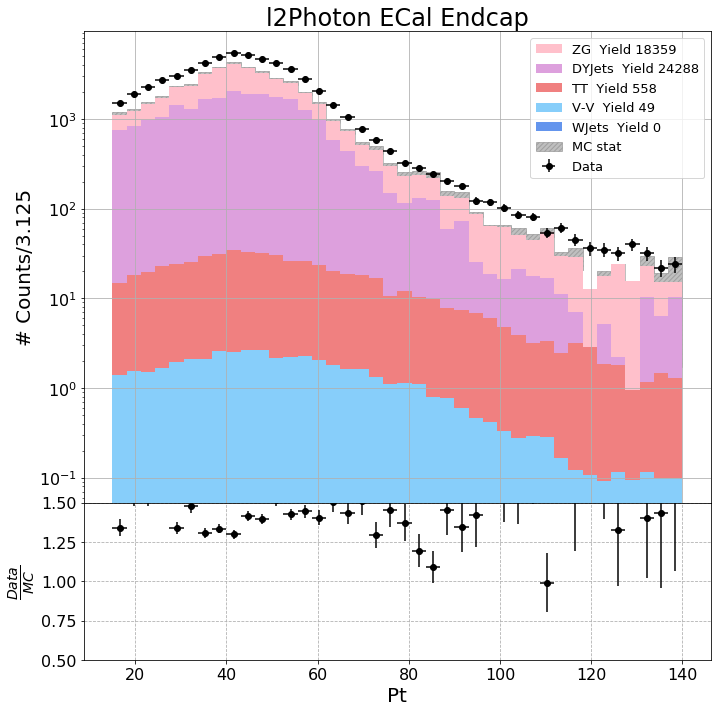

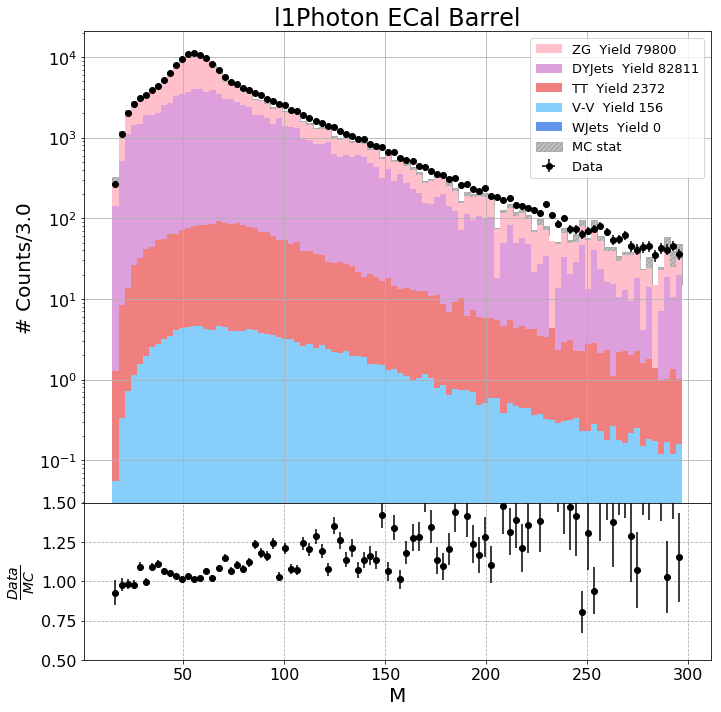

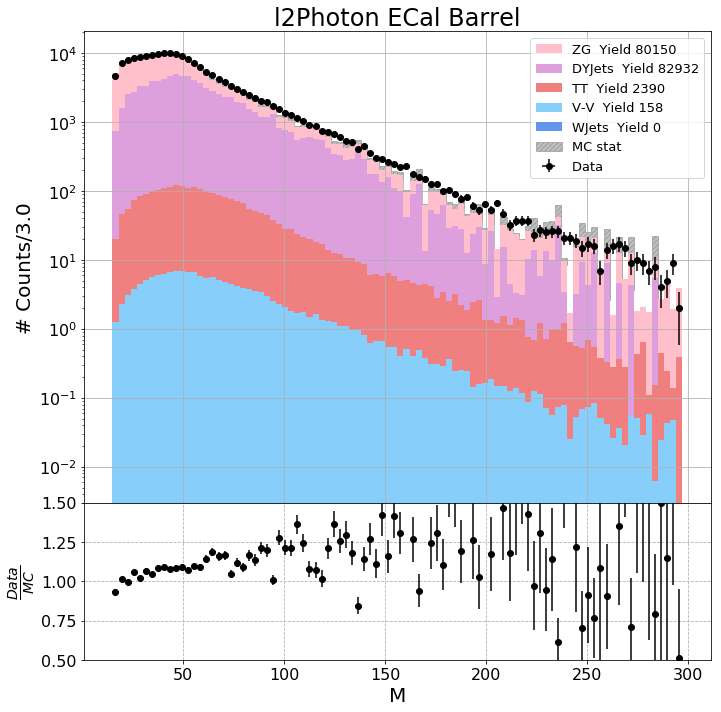

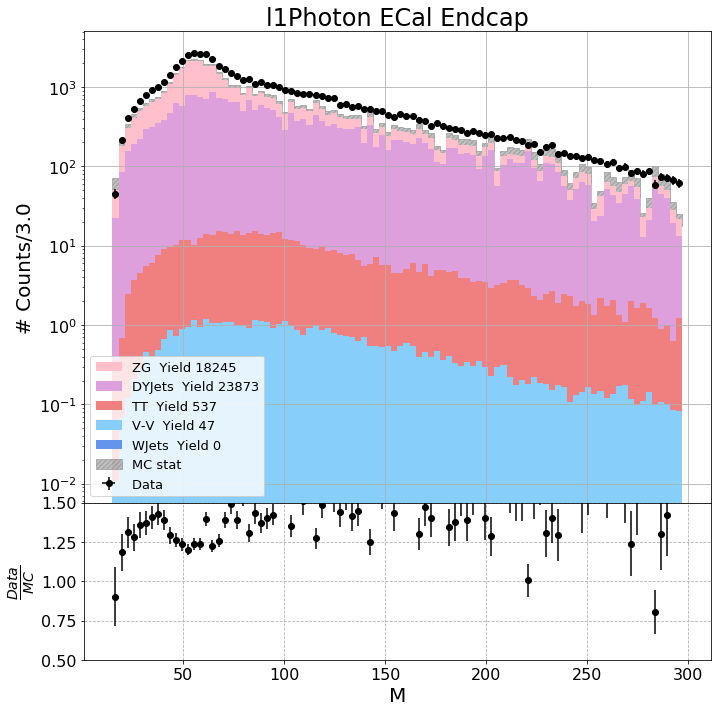

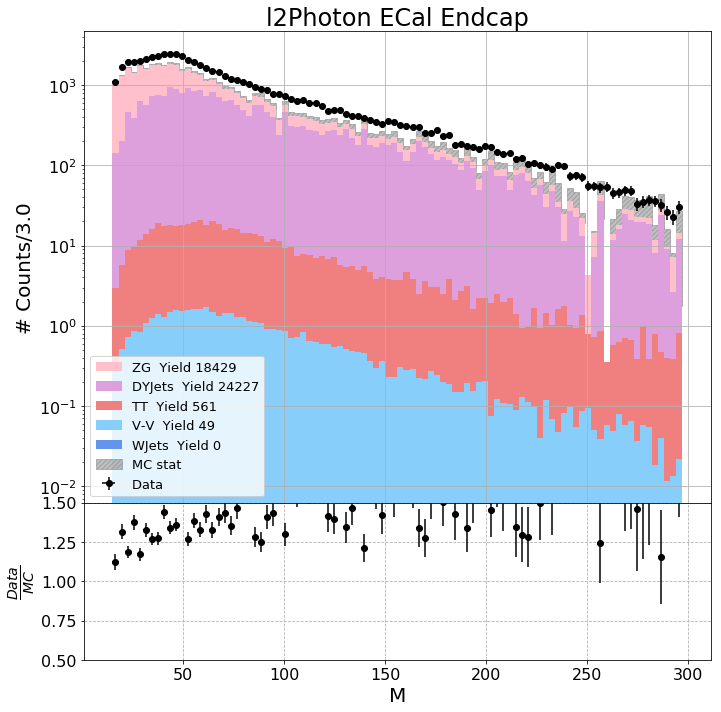

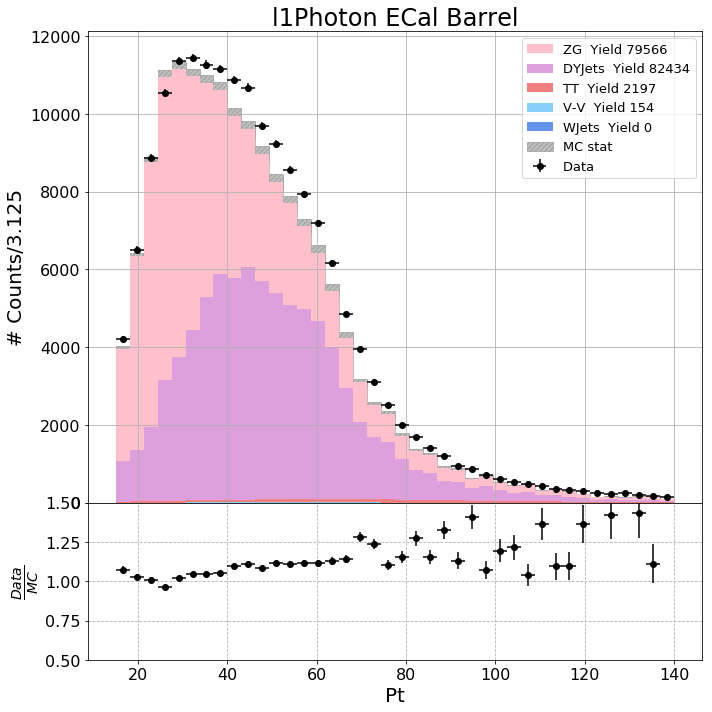

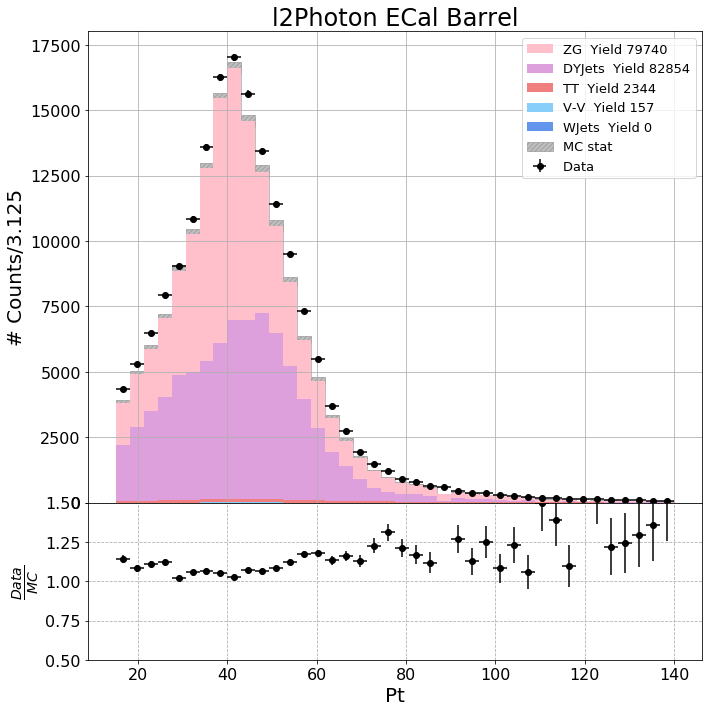

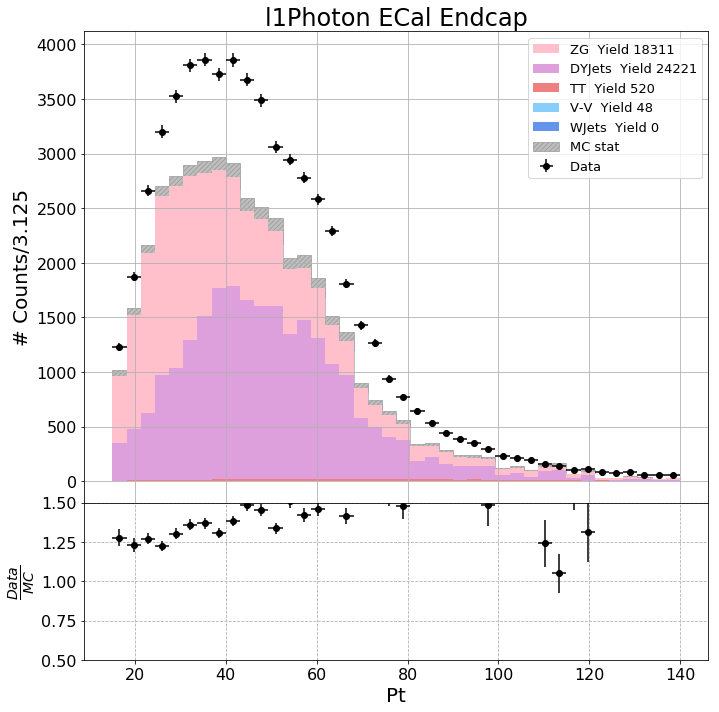

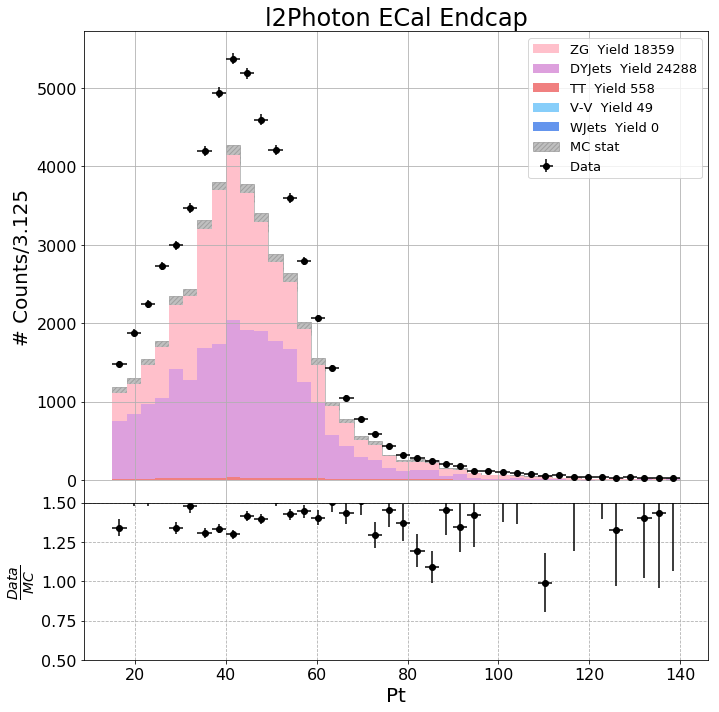

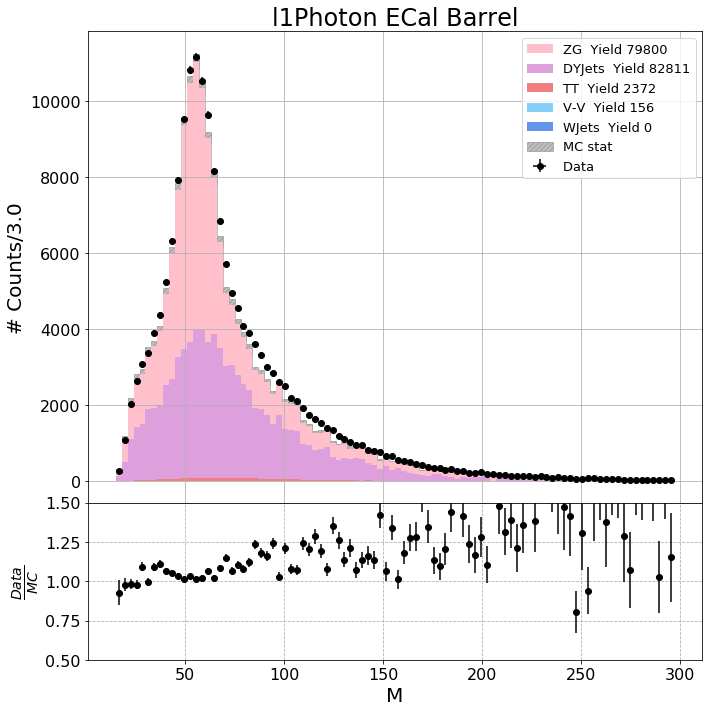

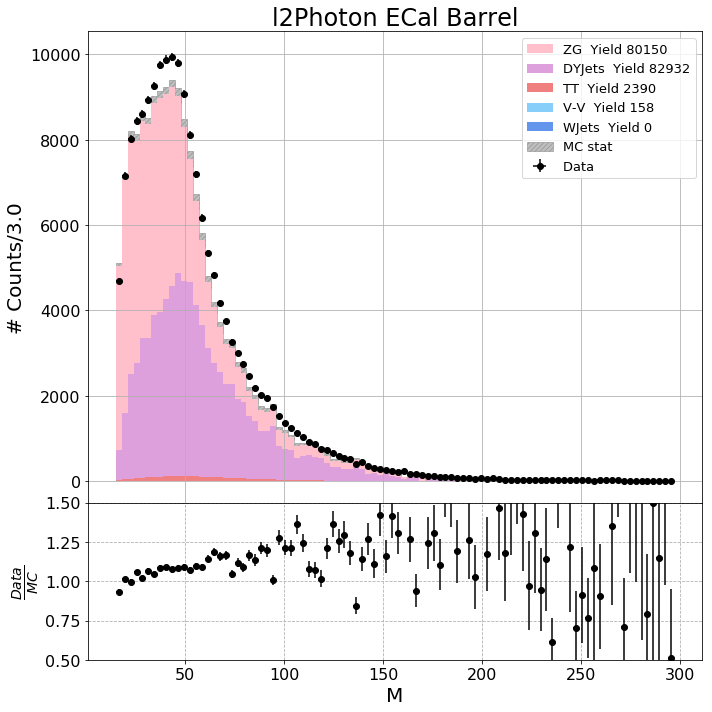

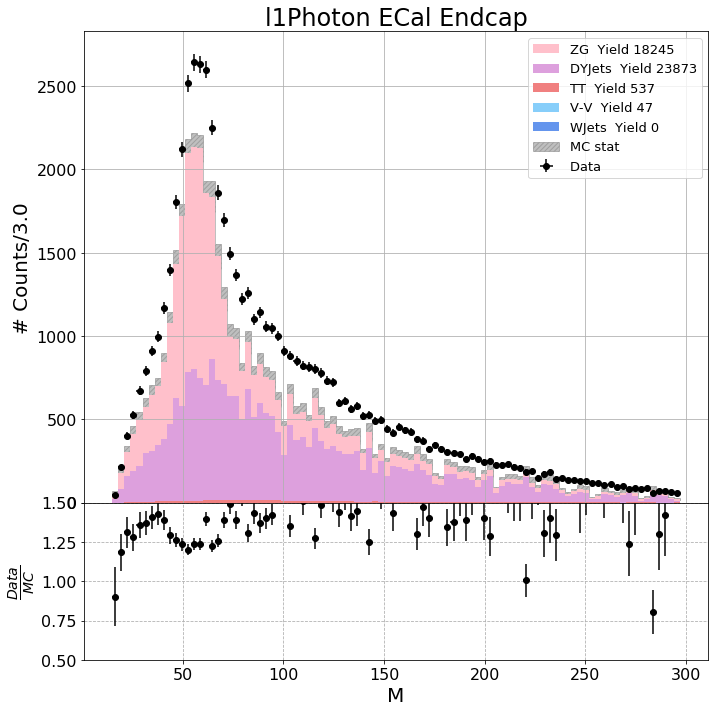

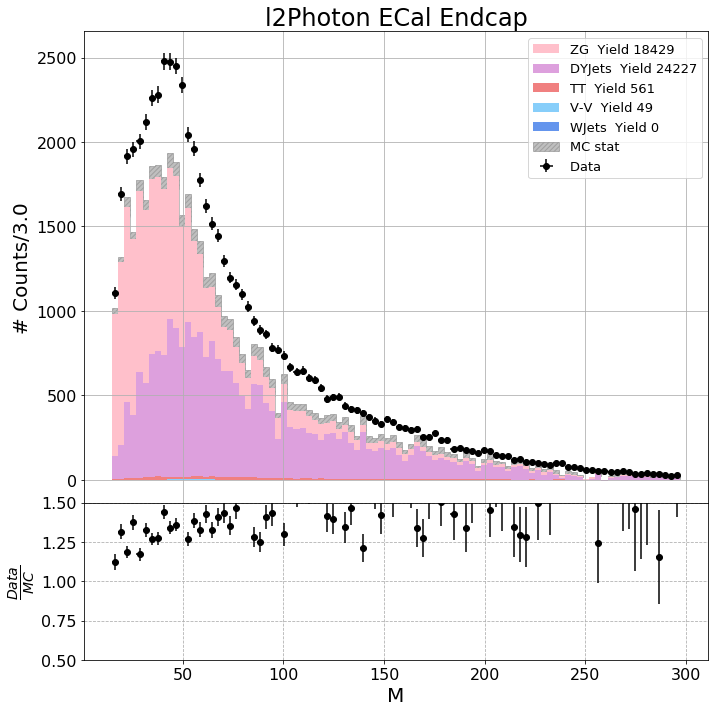

In [13]:
for log in [True,False]:
    for v in ['Pt','M']:
        for phType in ['_EB','_EE']:
            for p in ['l1Photon'+phType,'l2Photon'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = True,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             Print            = Print,
                             index            = Region+'_'+phType,
                            );

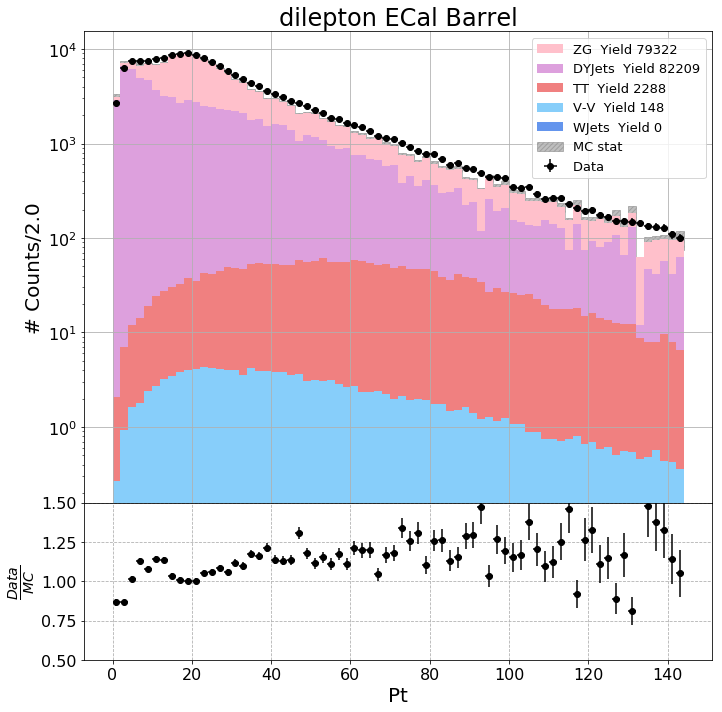

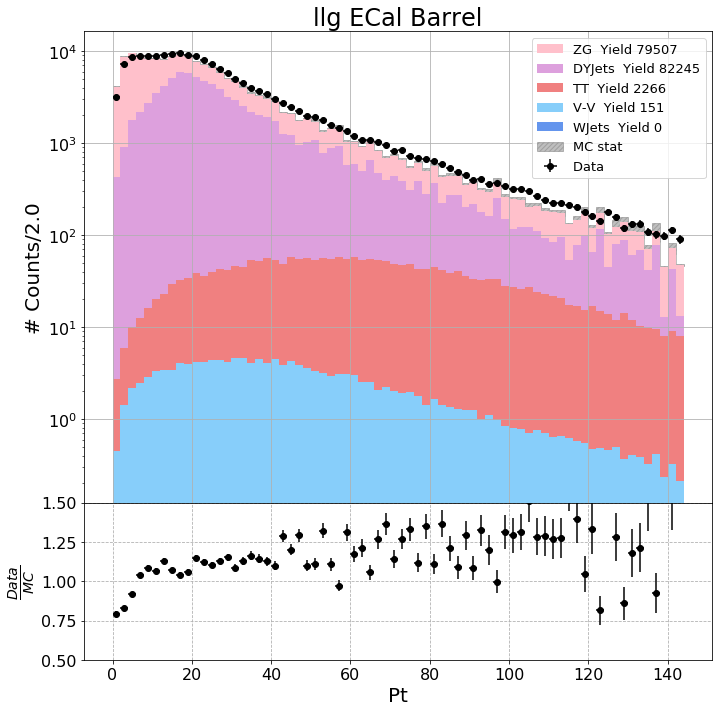

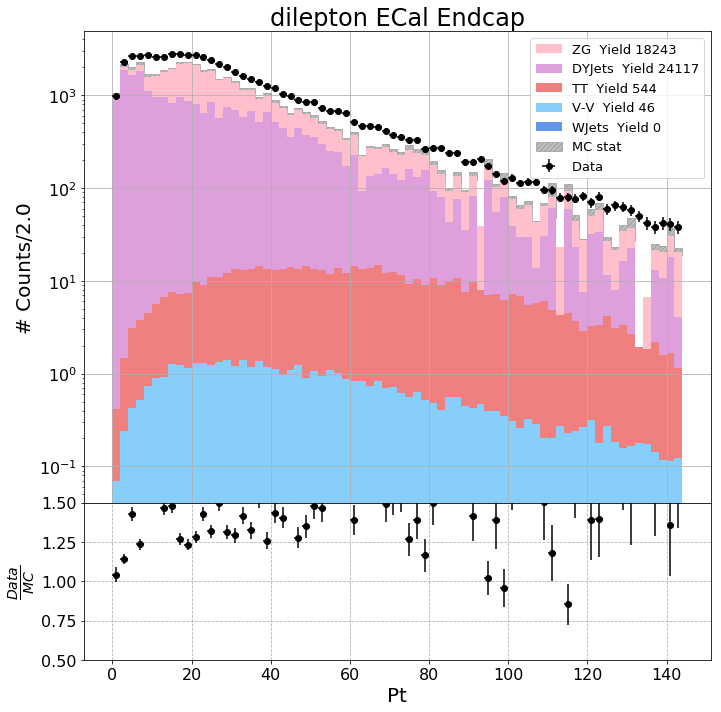

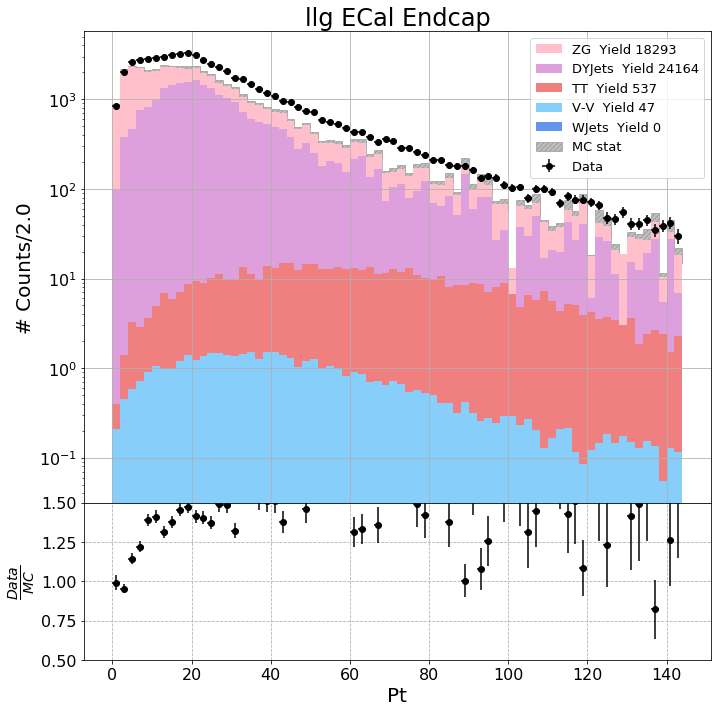

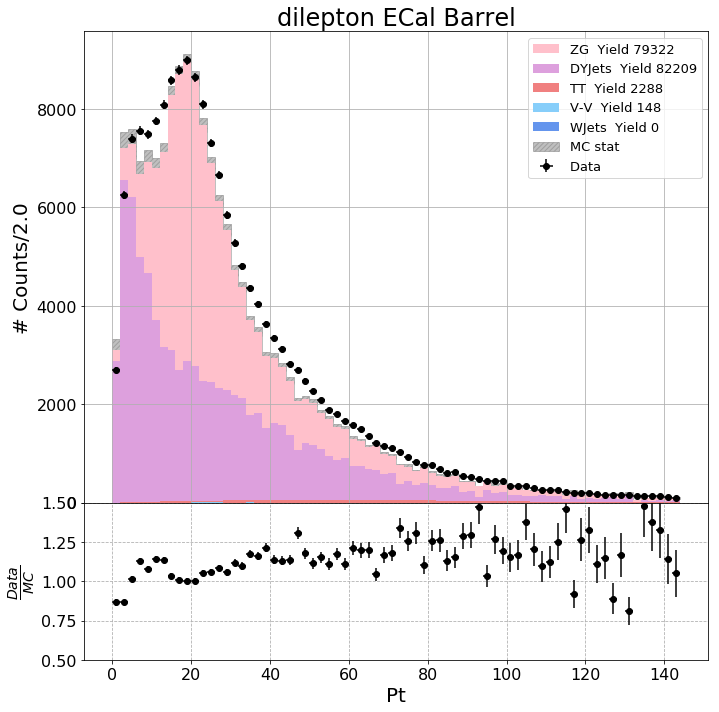

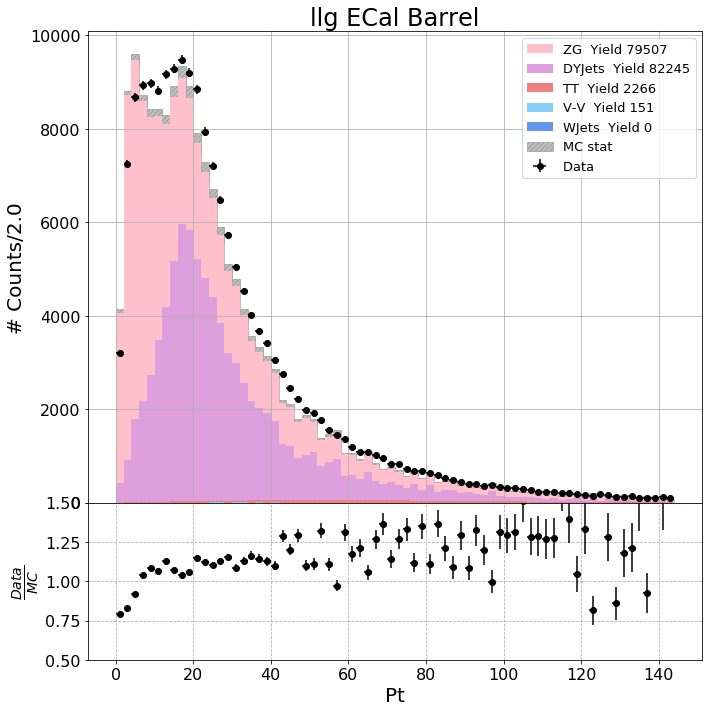

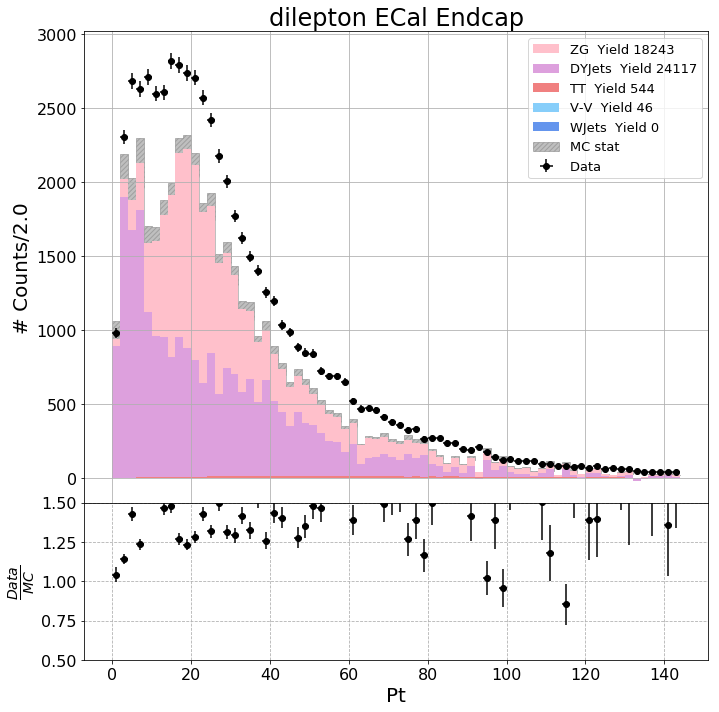

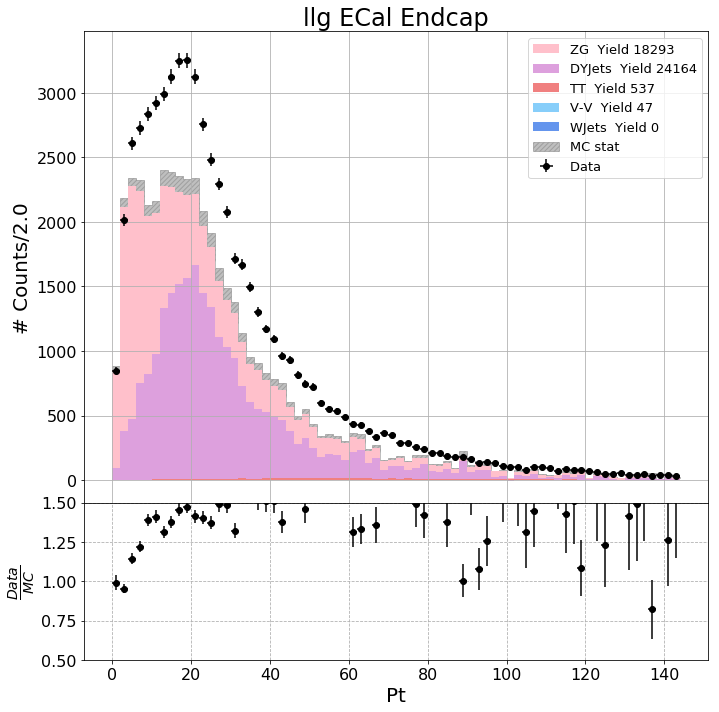

In [14]:
for log in [True,False]:
    for v in ['Pt']:
        for phType in ['EB','EE']:
            for p in ['dilepton_'+phType,'llg_'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = False,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             Print            = Print,
                             index            = Region+'_'+phType,
                            );

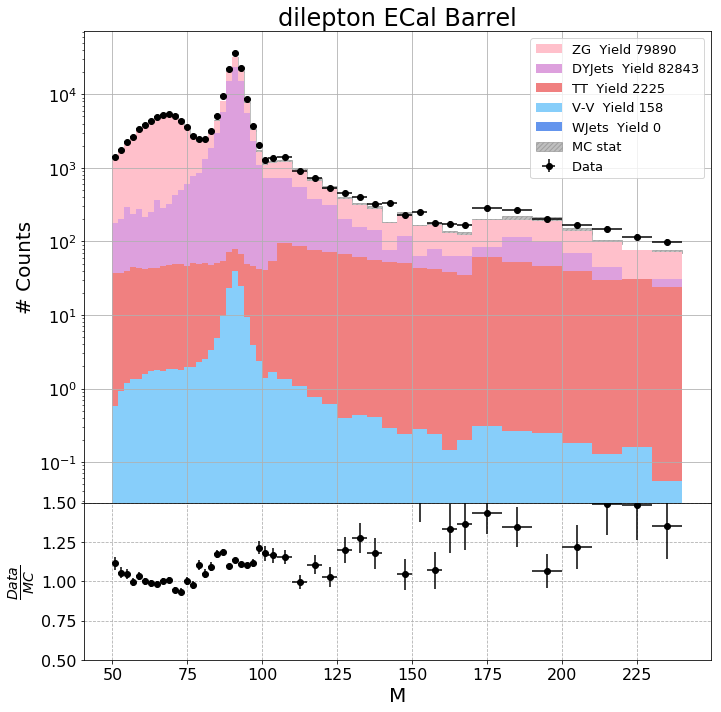

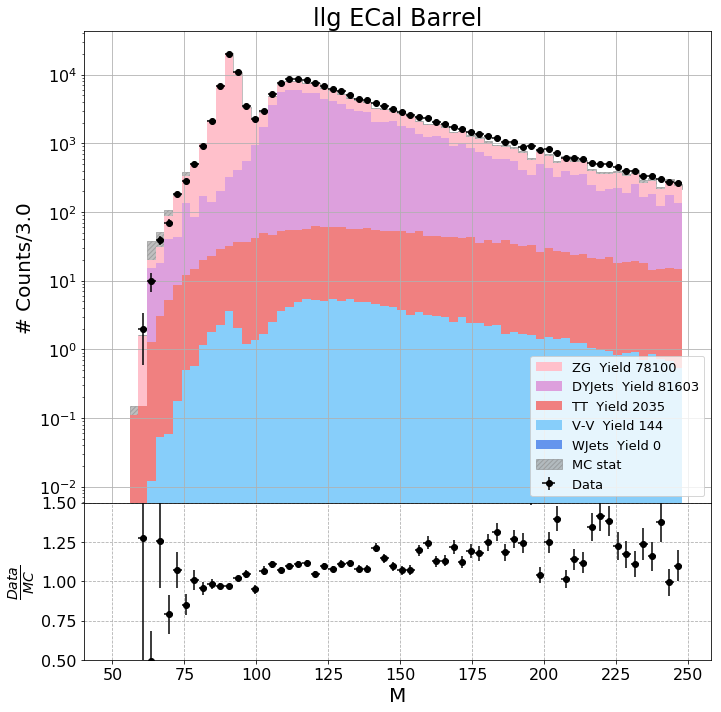

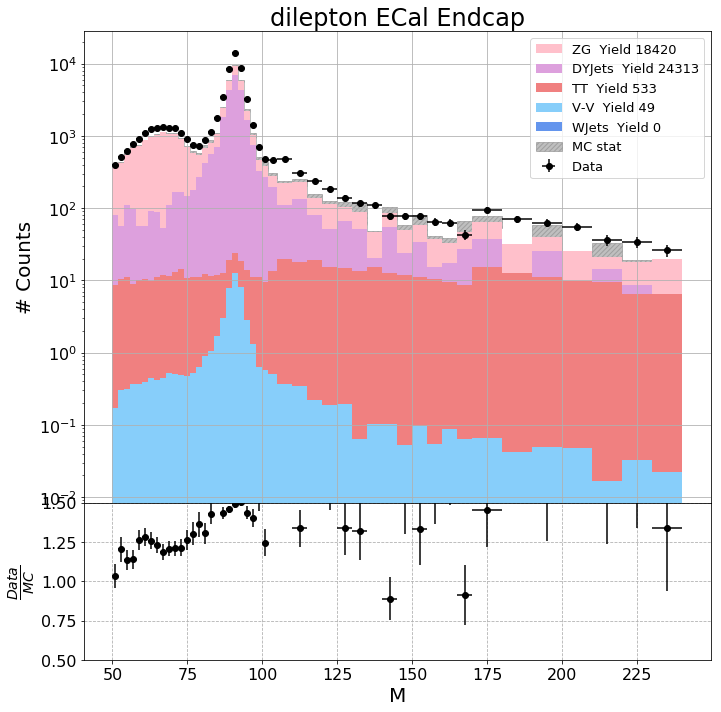

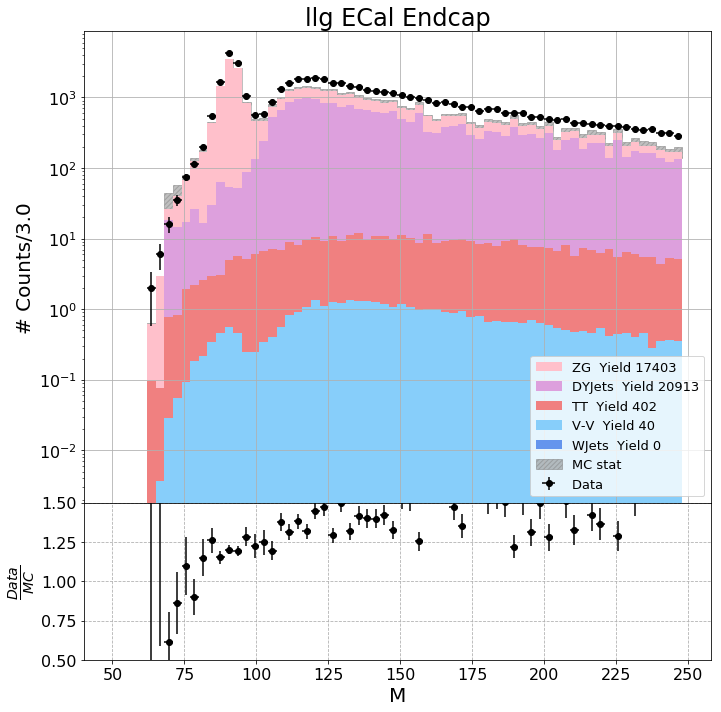

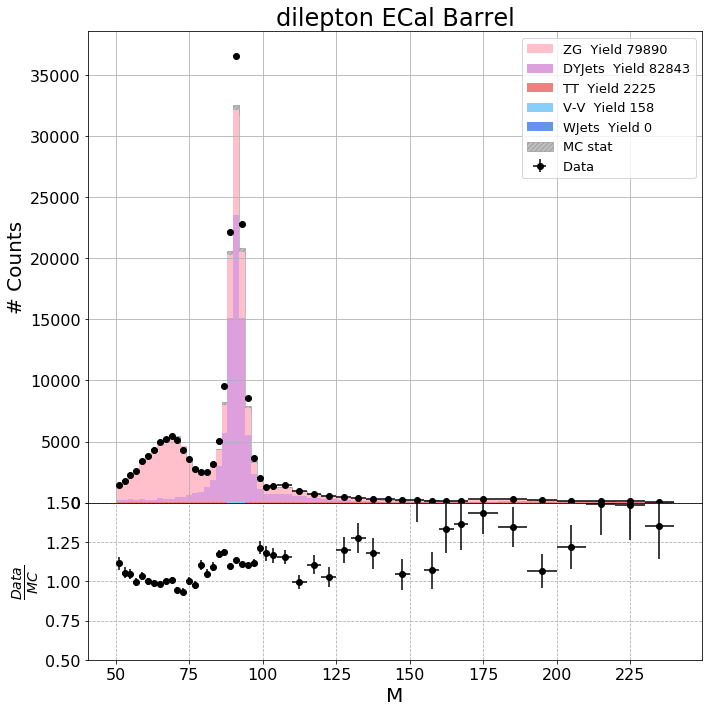

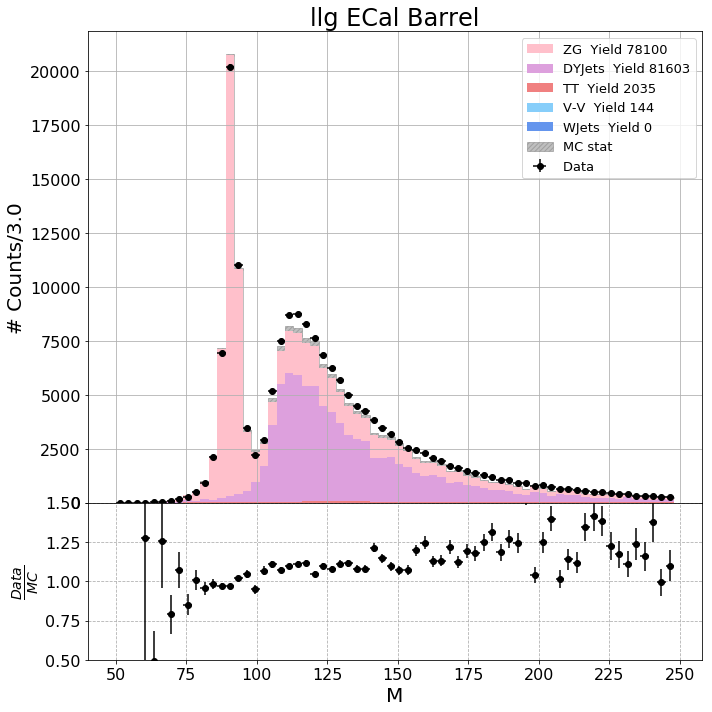

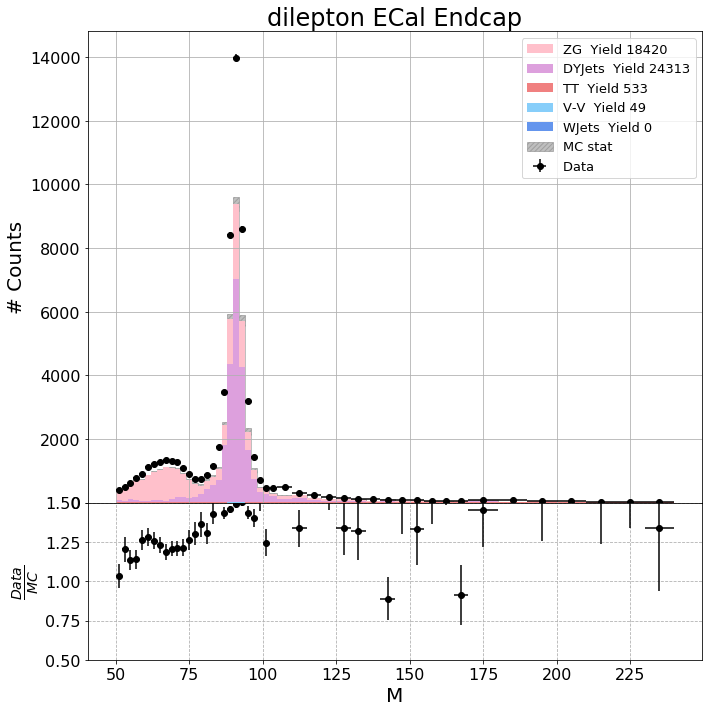

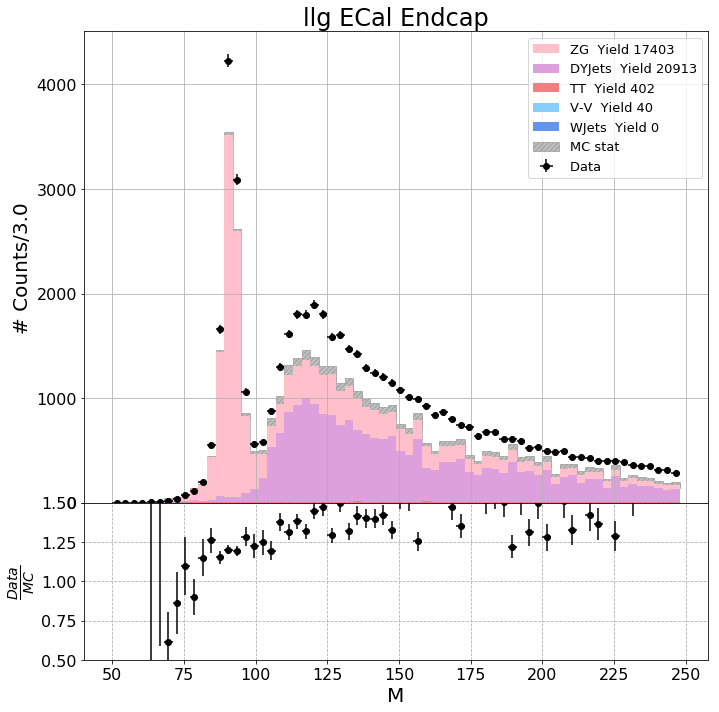

In [15]:
for log in [True,False]:
    for v in ['M']:
        for phType in ['EB','EE']:
            for p in ['dilepton_'+phType,'llg_'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = False,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             Print            = Print,
                             index            = Region+'_'+phType,
                            );

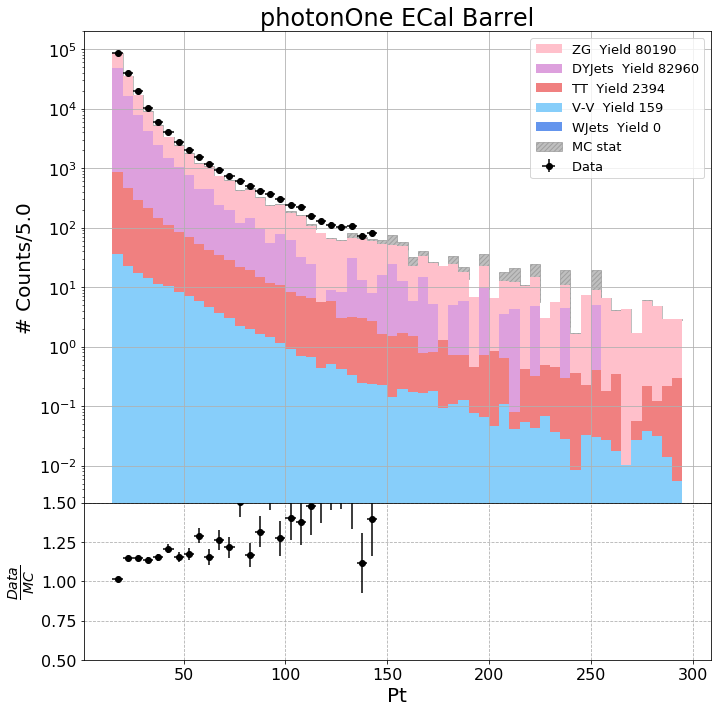

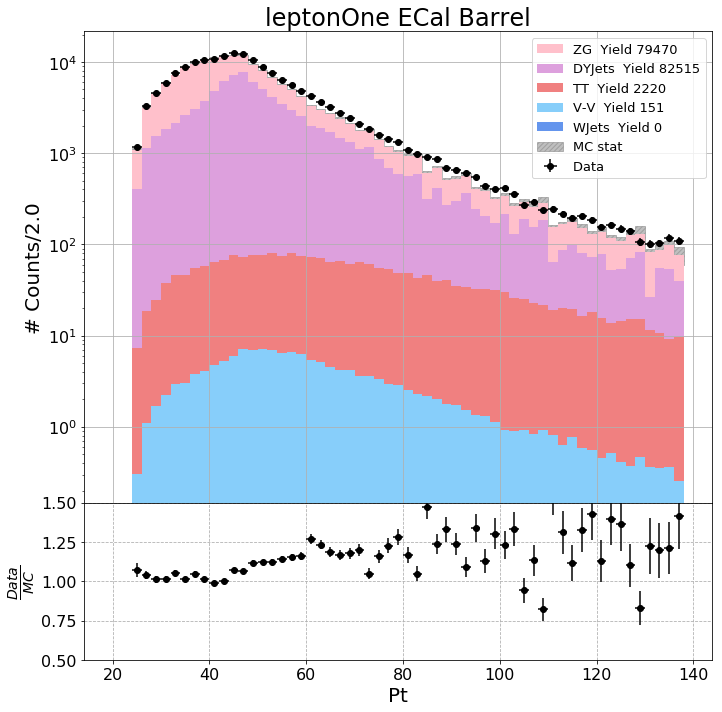

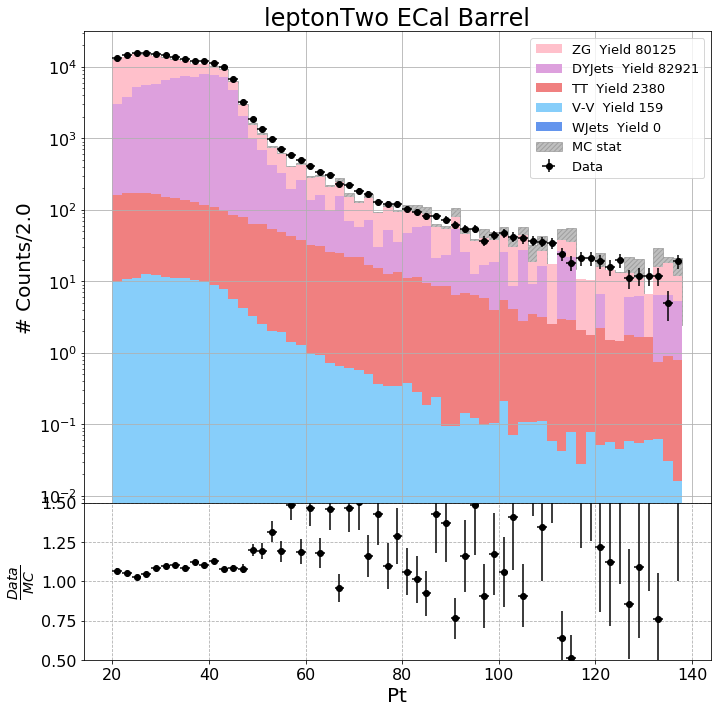

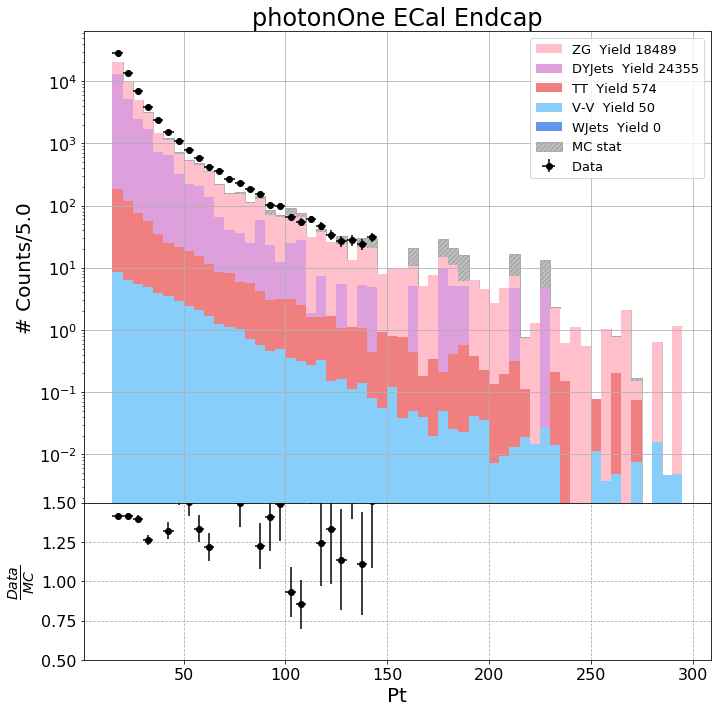

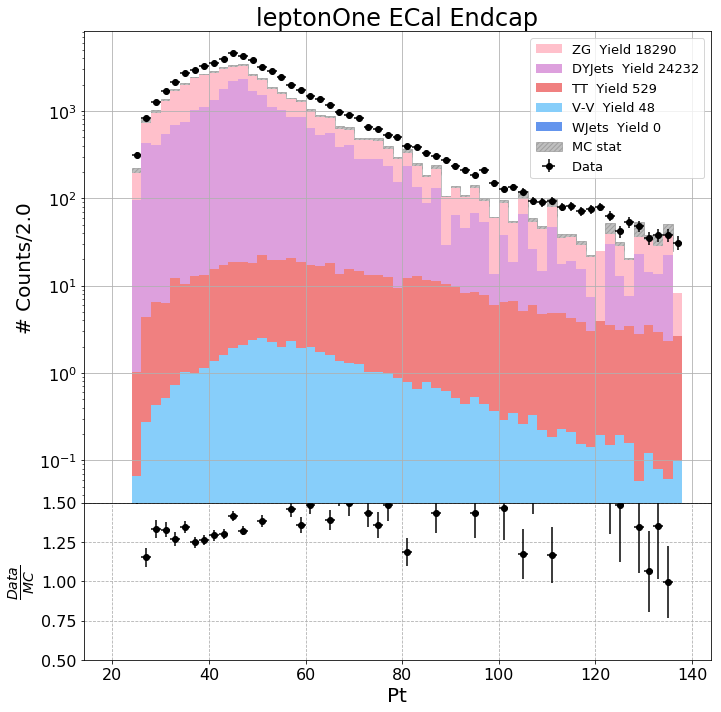

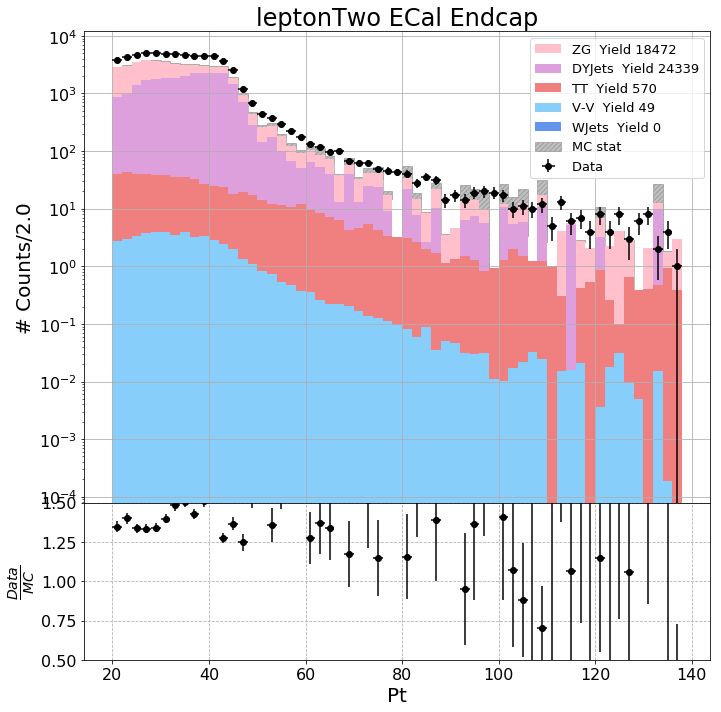

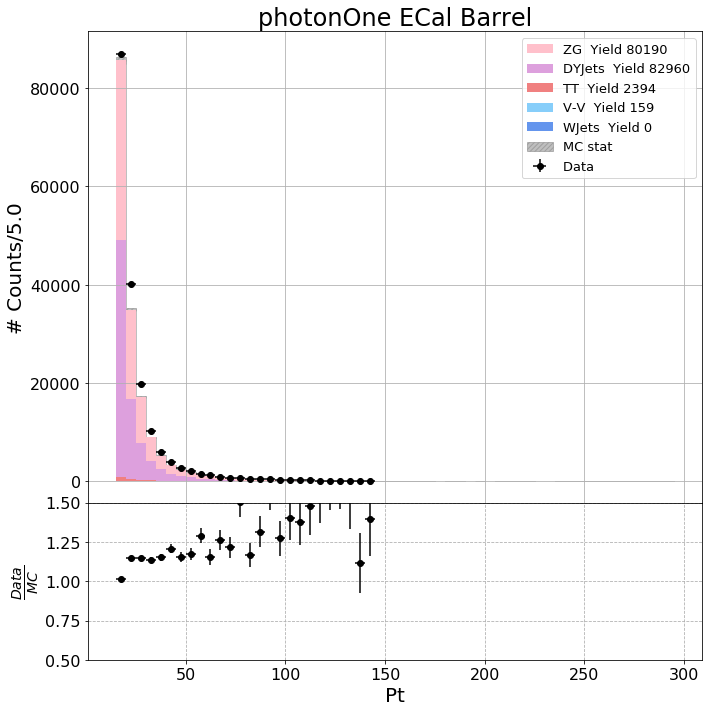

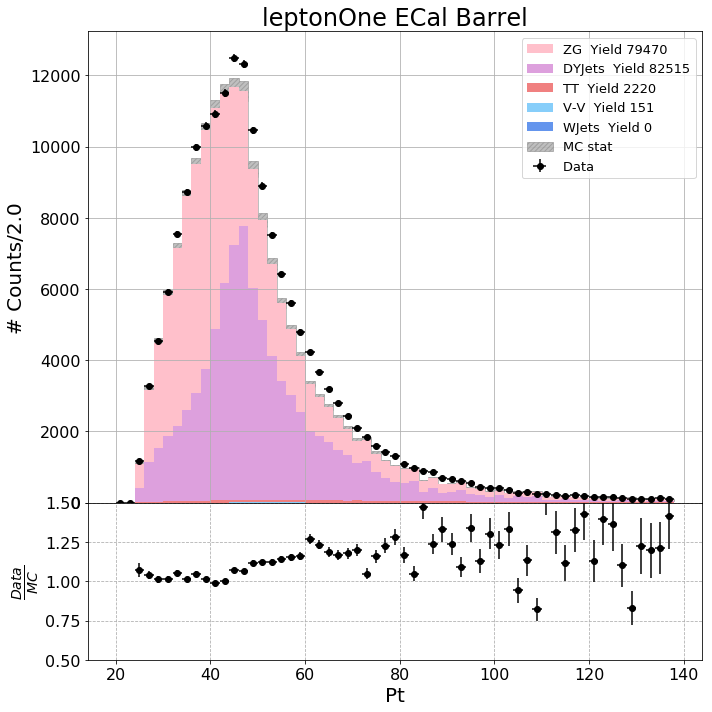

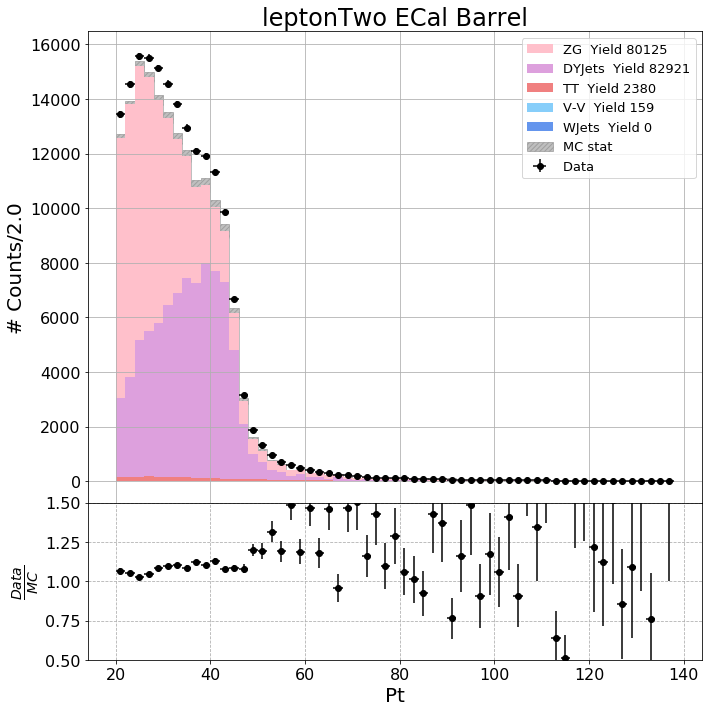

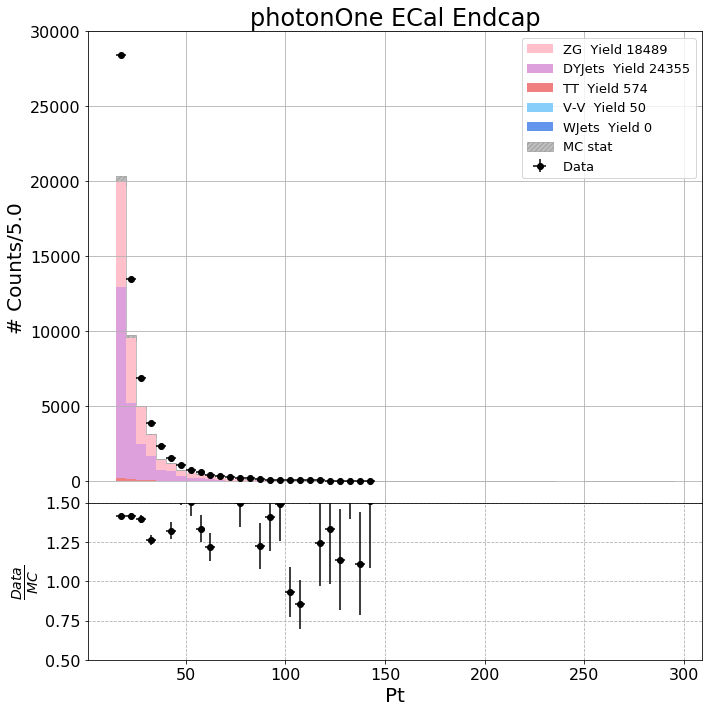

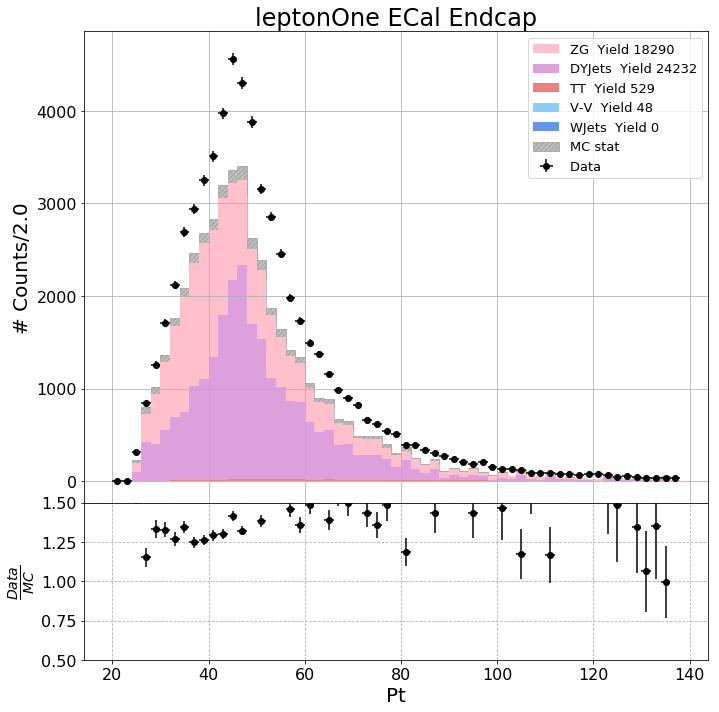

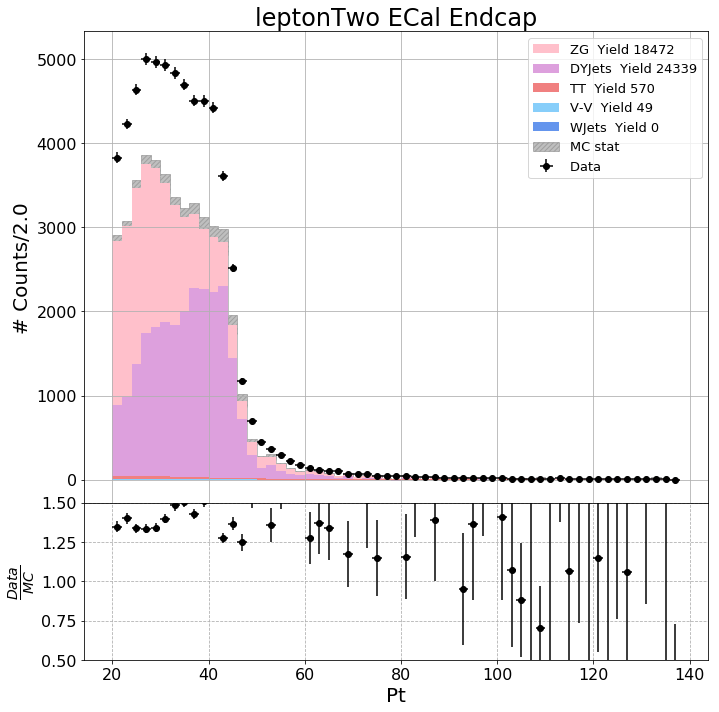

In [16]:
for log in [True,False]:
    for v in ['Pt']:
        for phType in ['EB','EE']:
            for p in ['photonOne_'+phType,'leptonOne_'+phType,'leptonTwo_'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = False,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             index            = Region+'_'+phType,
                            );

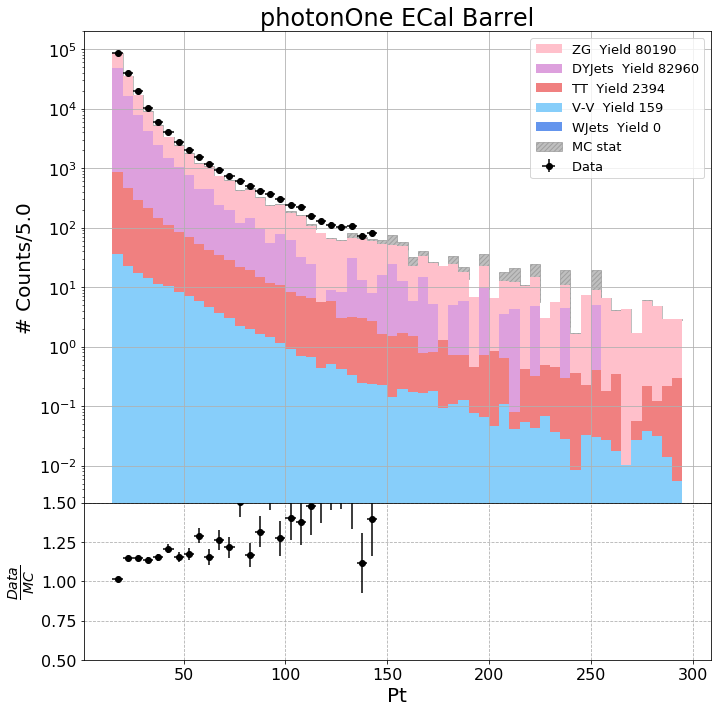

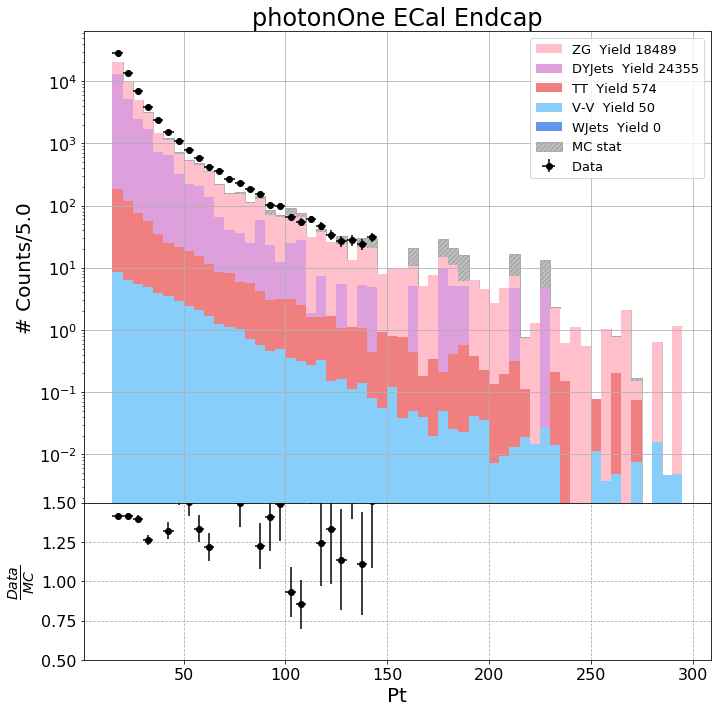

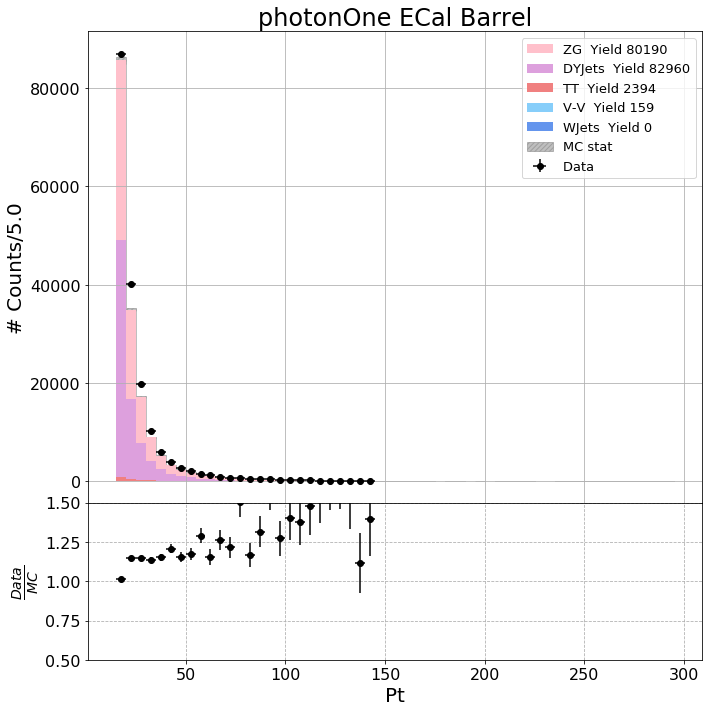

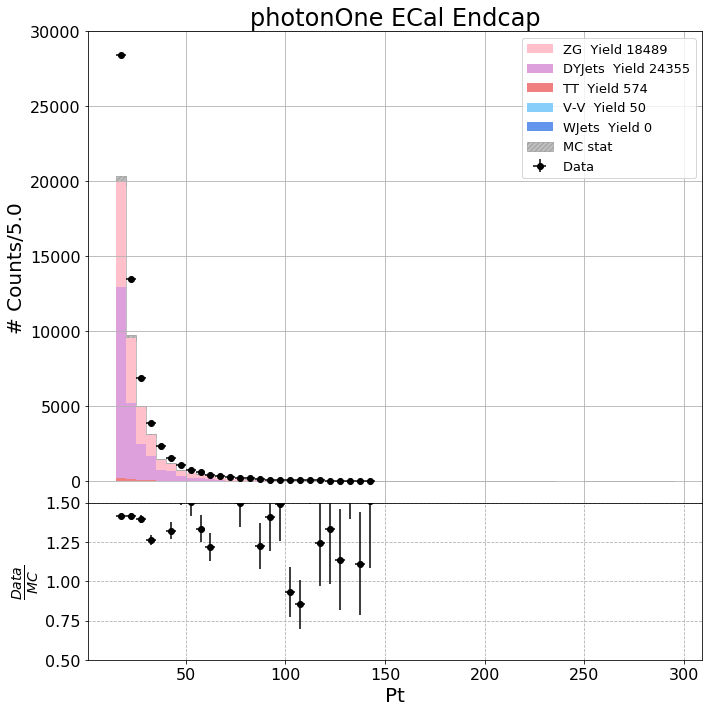

In [17]:
for log in [True,False]:
    for v in ['Pt']:
        for phType in ['EB','EE']:
            for p in ['photonOne_'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = False,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             index            = Region+'_'+phType+SampleSet,
                            );

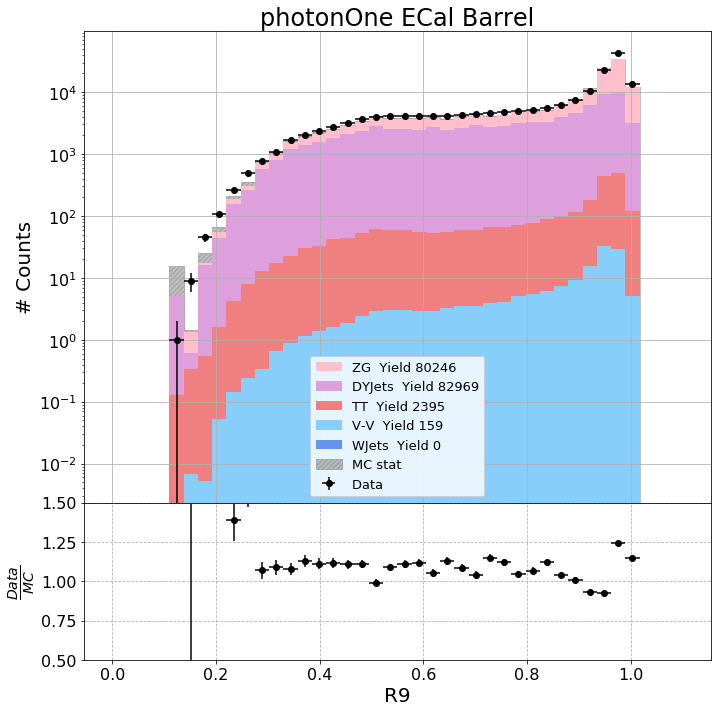

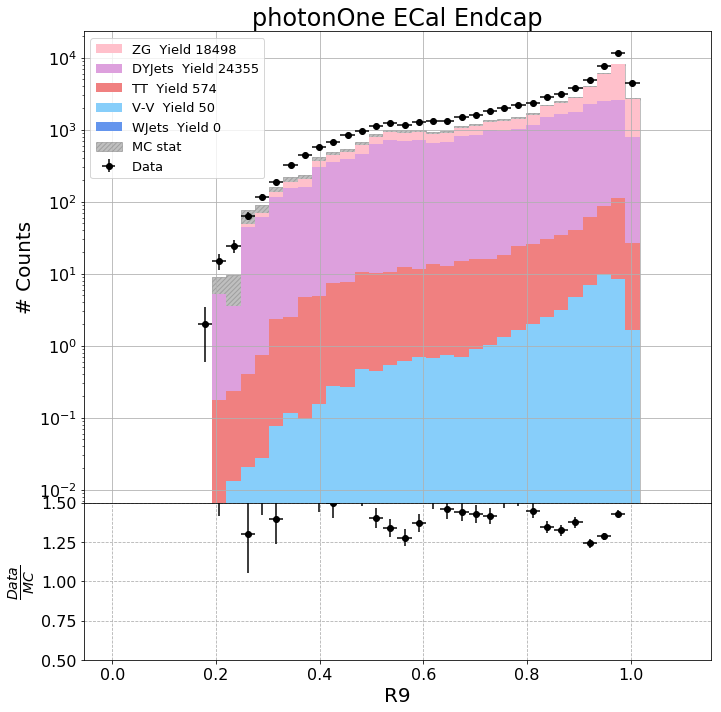

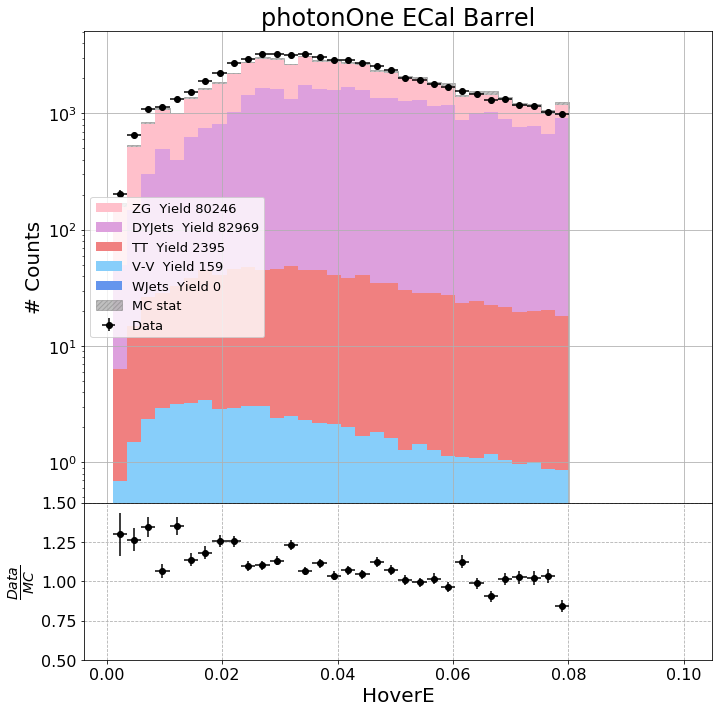

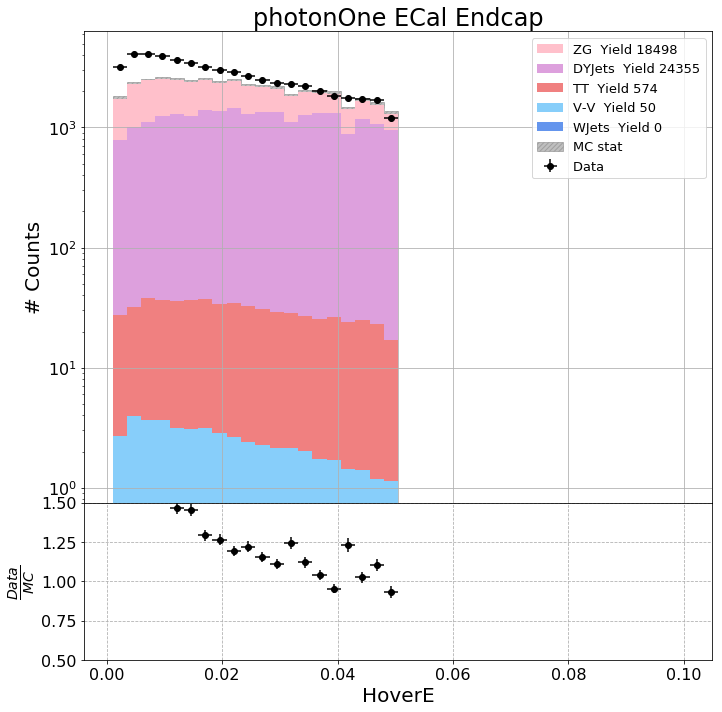

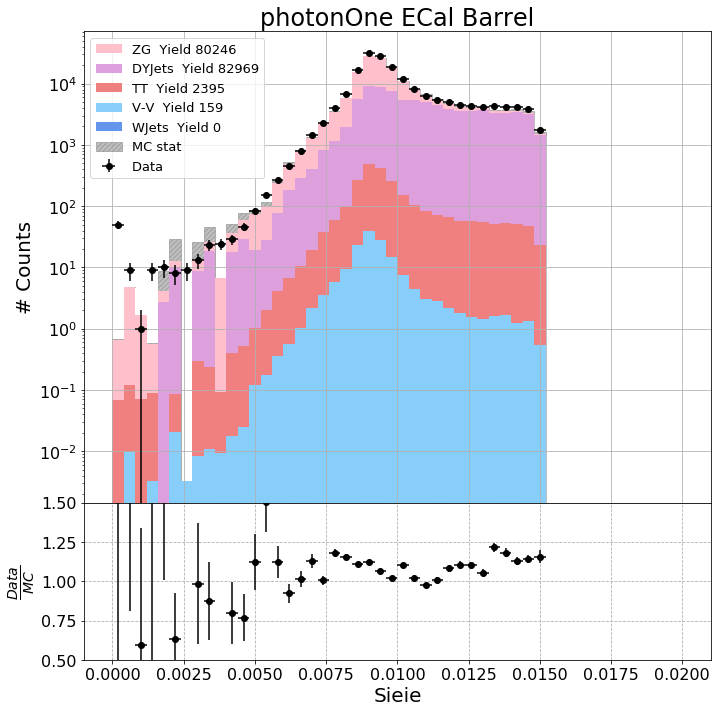

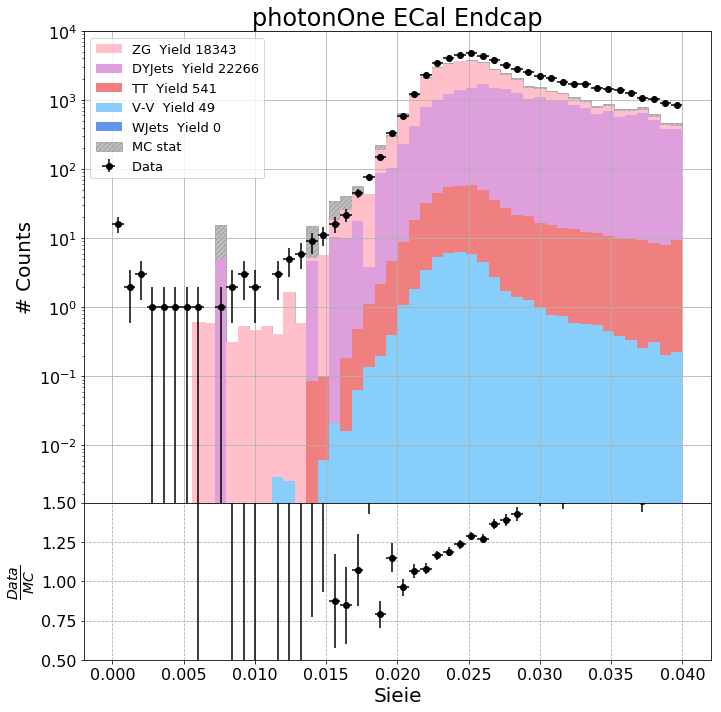

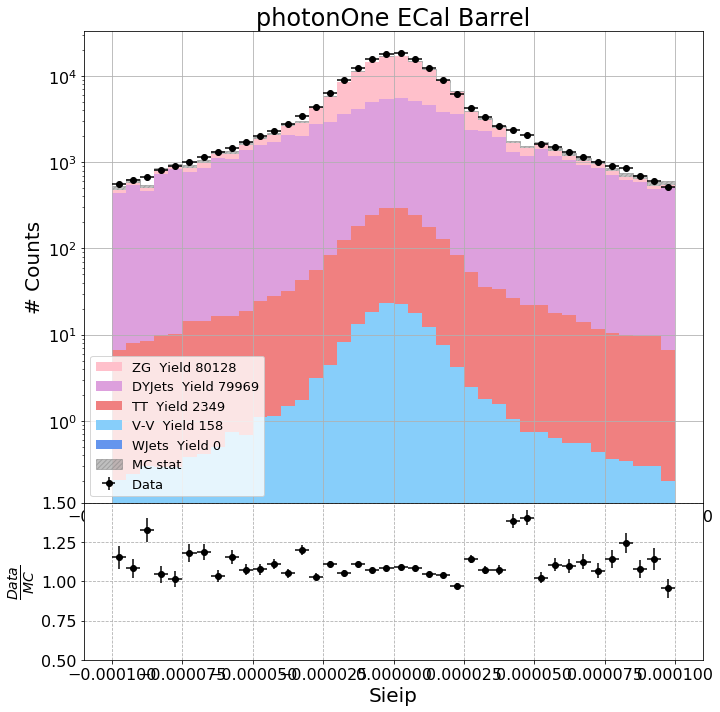

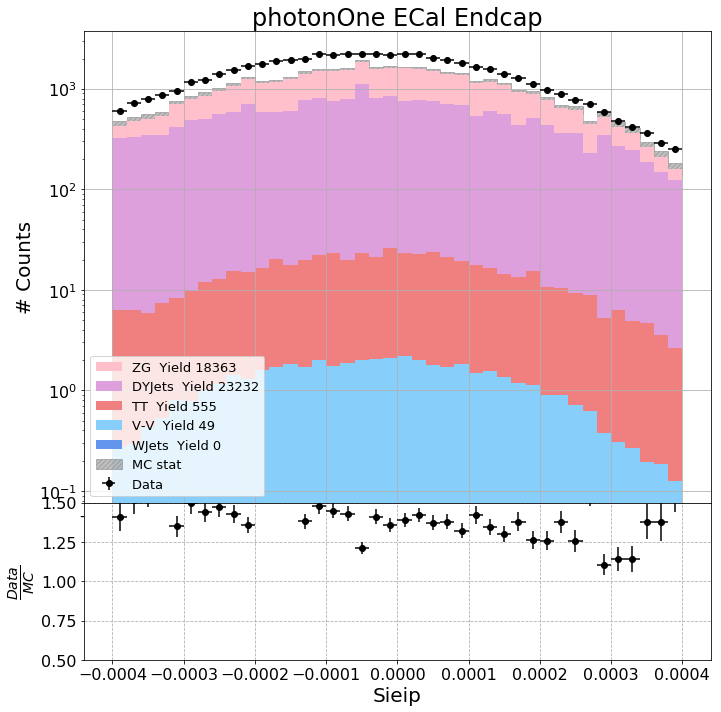

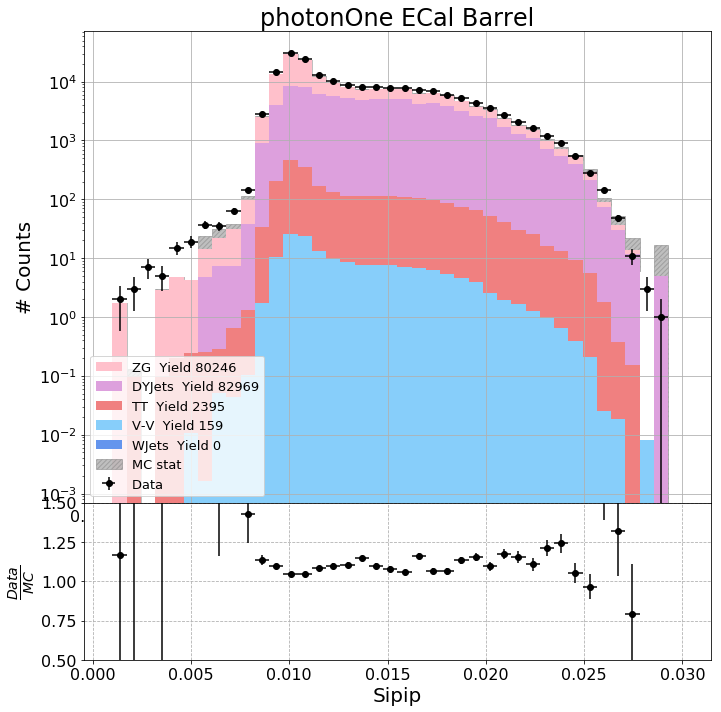

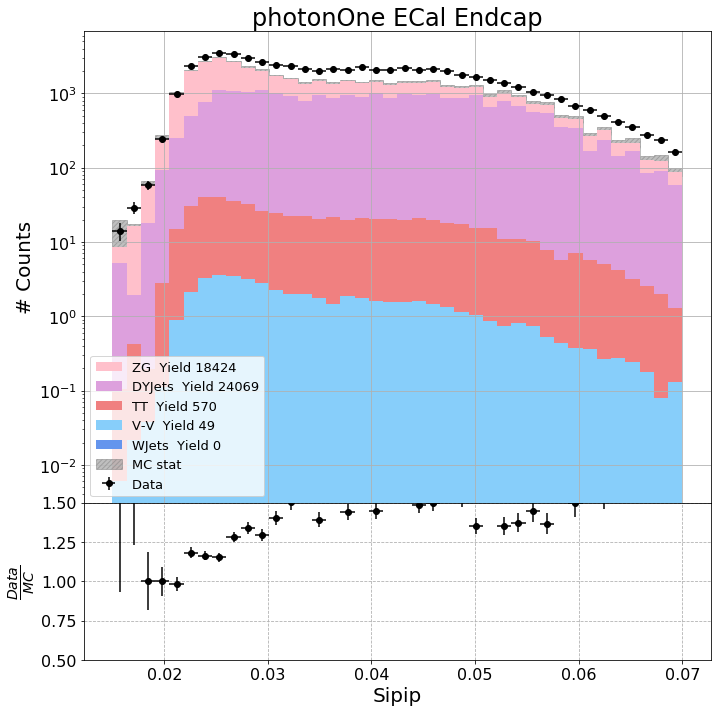

/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


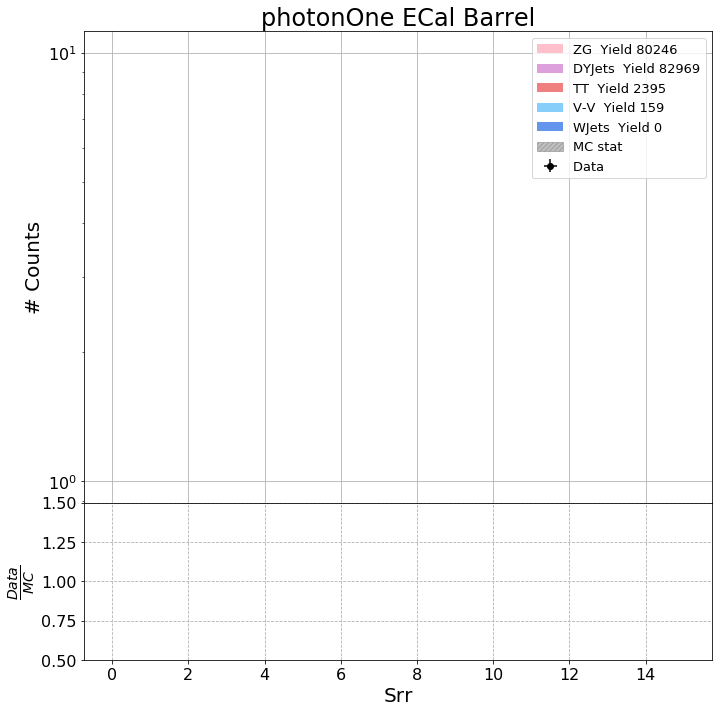

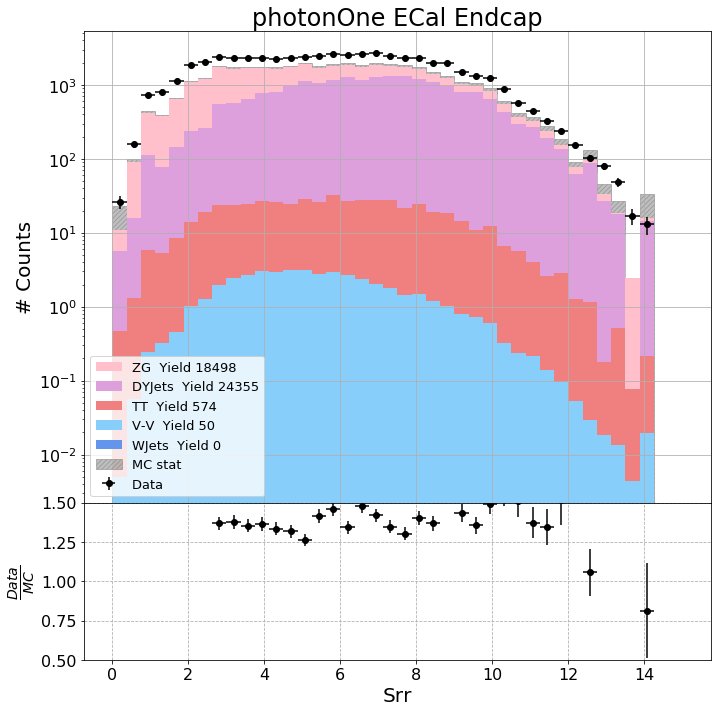

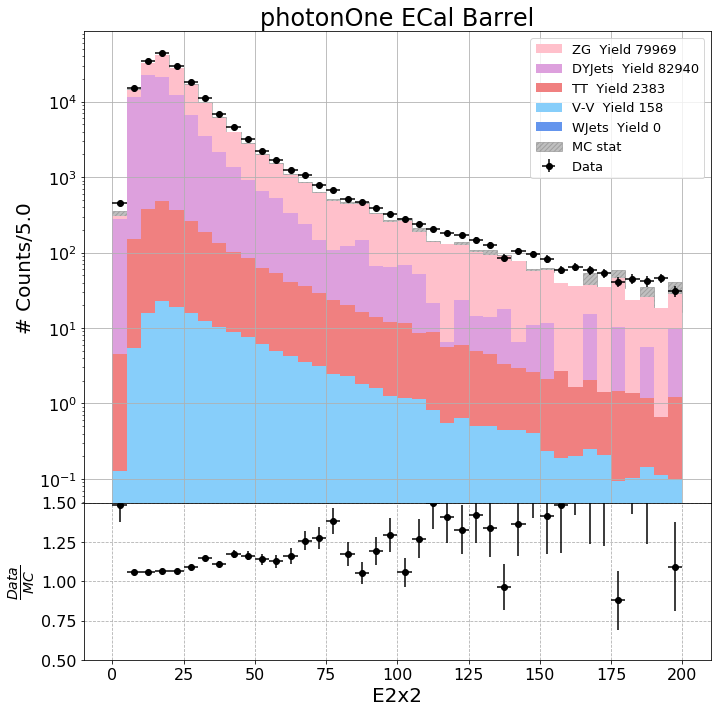

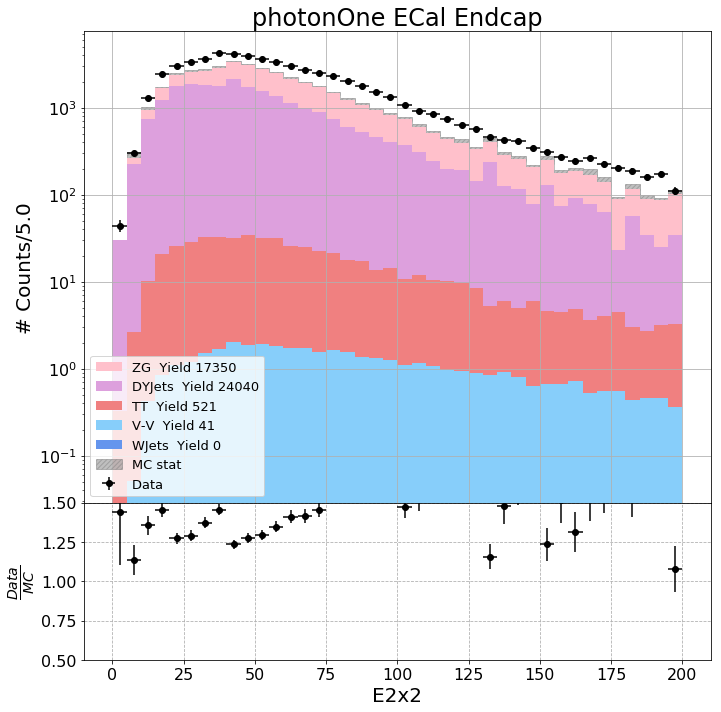

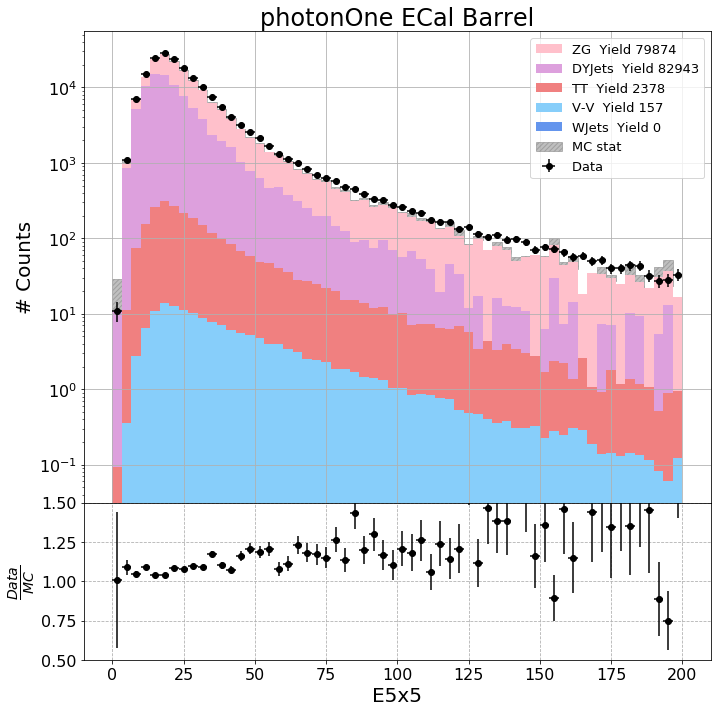

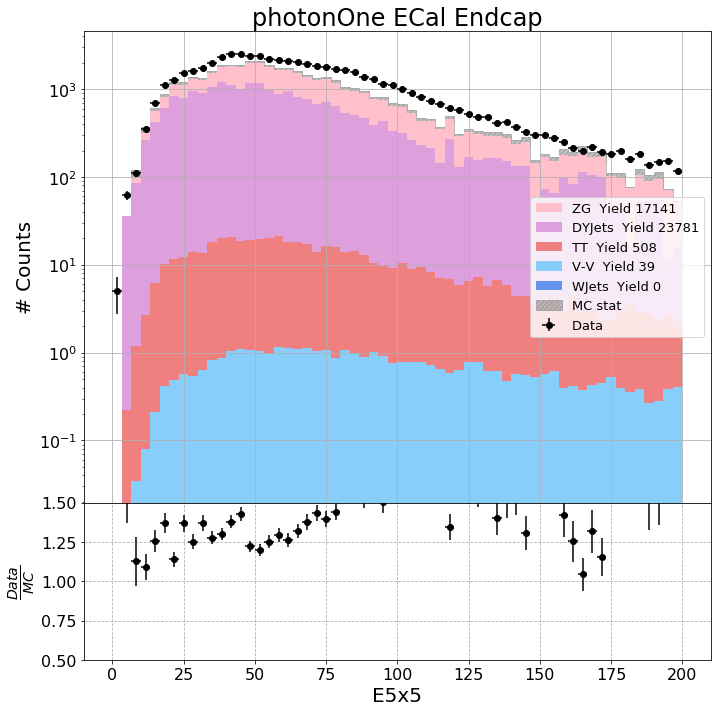

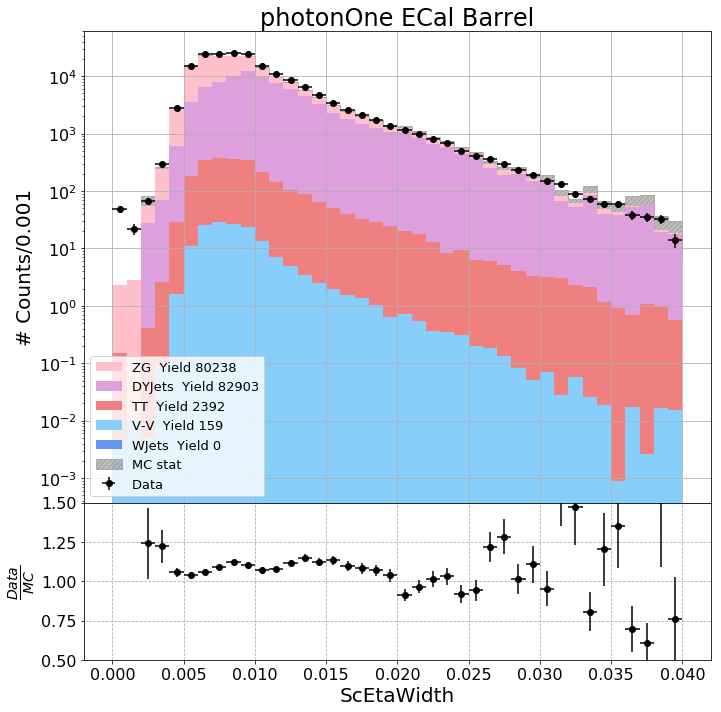

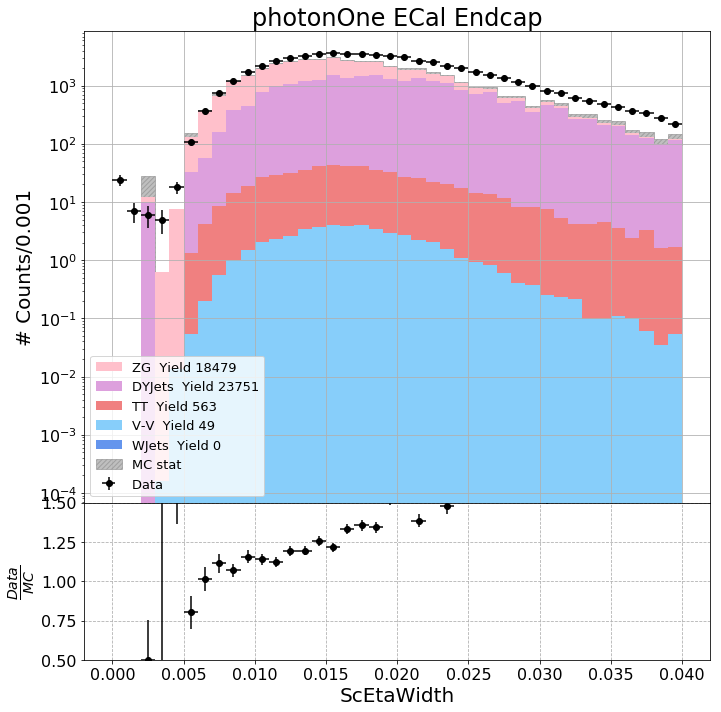

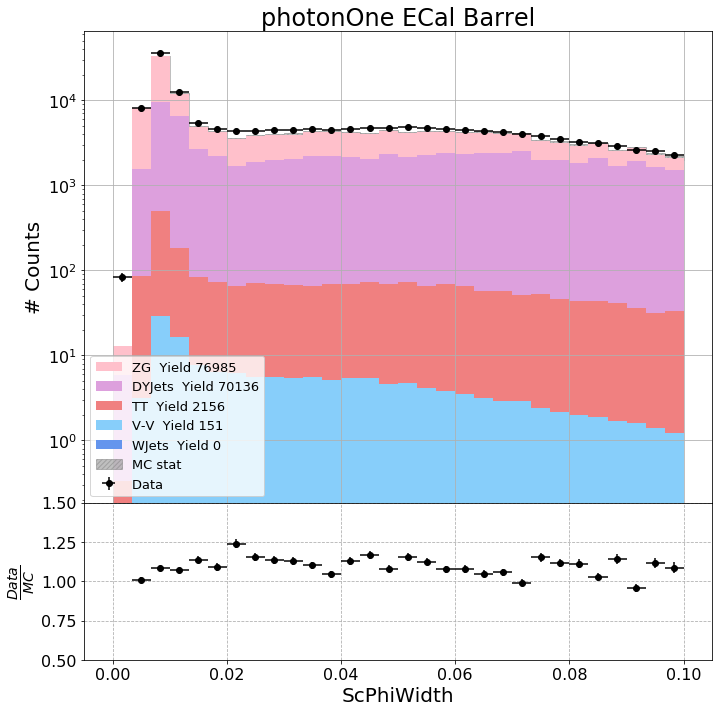

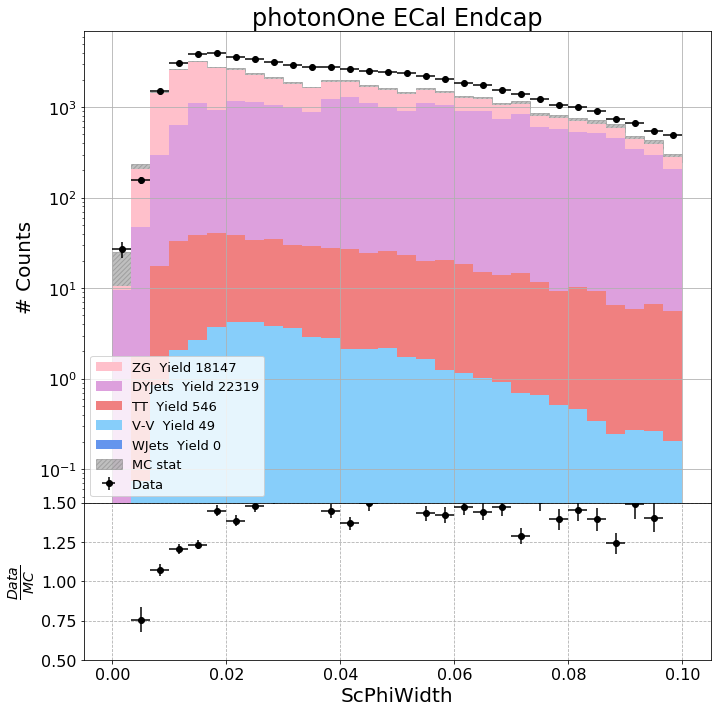

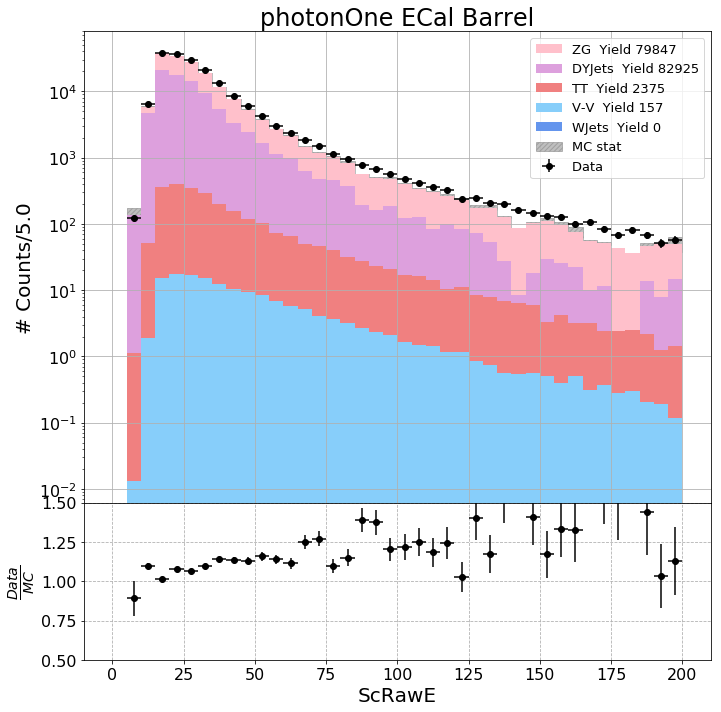

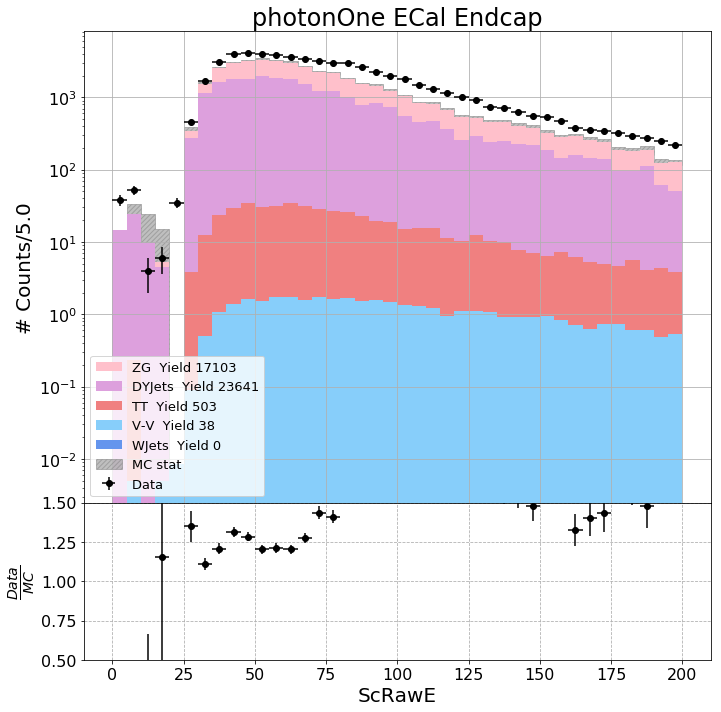

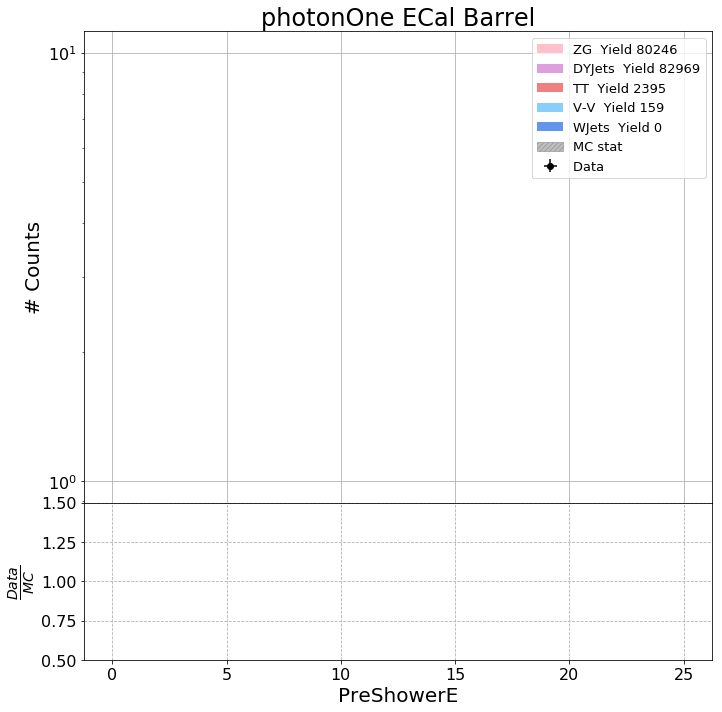

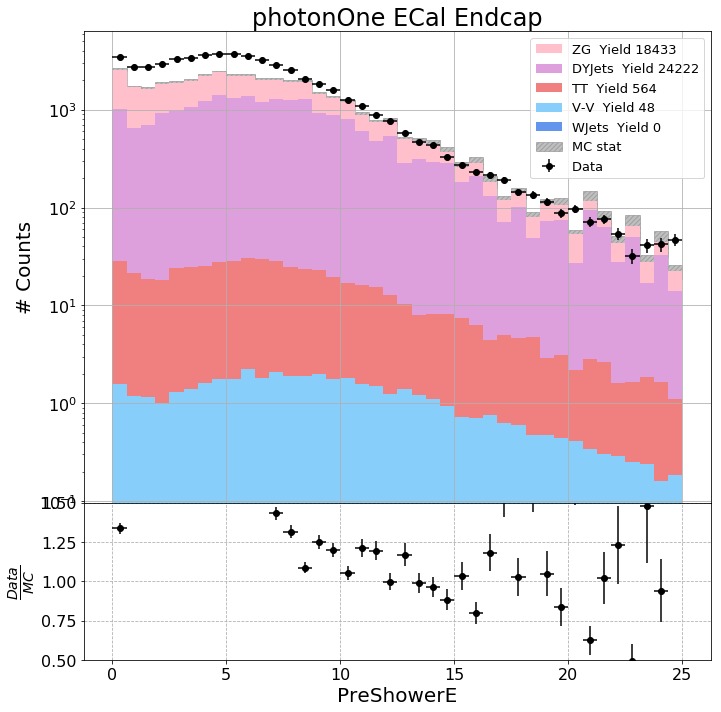

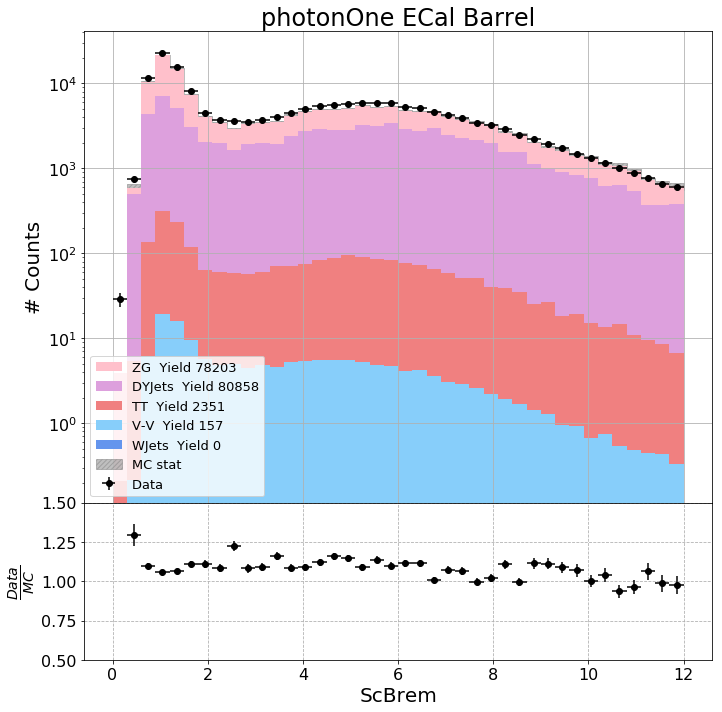

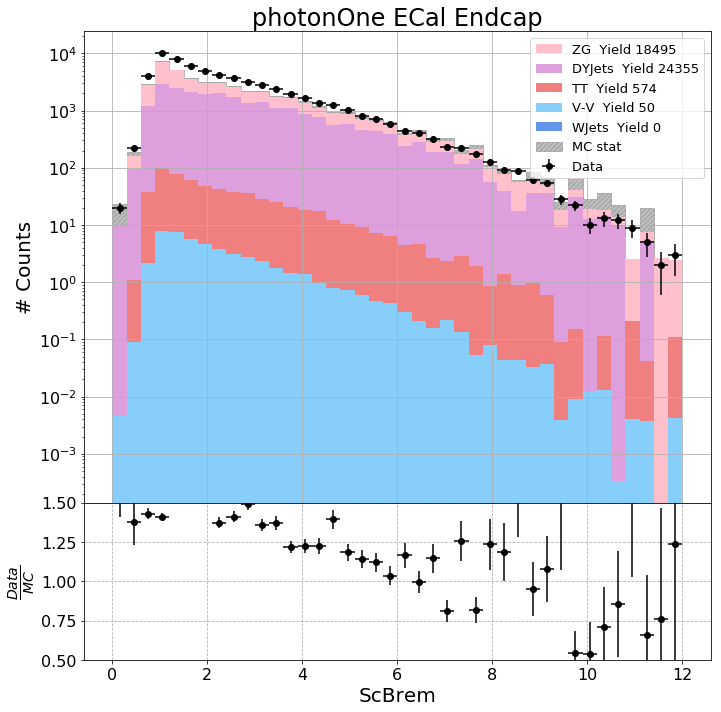

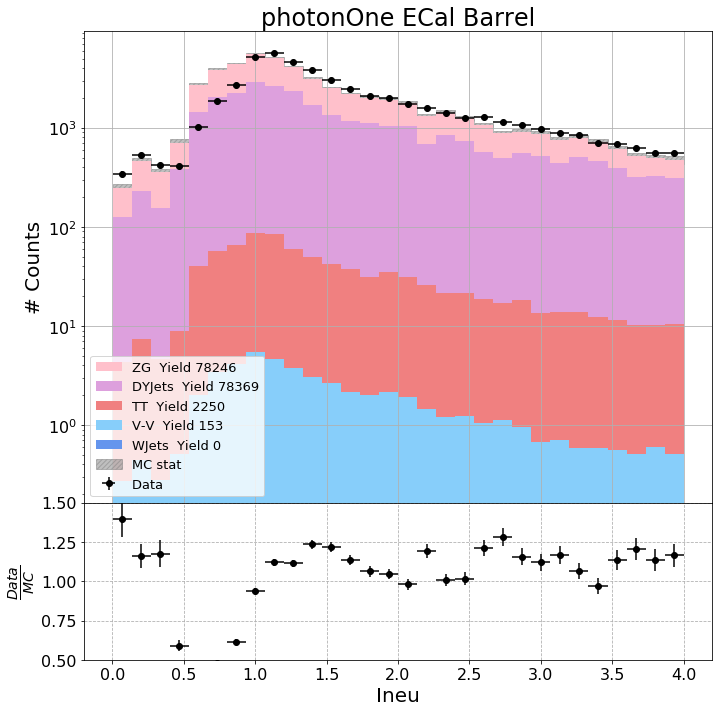

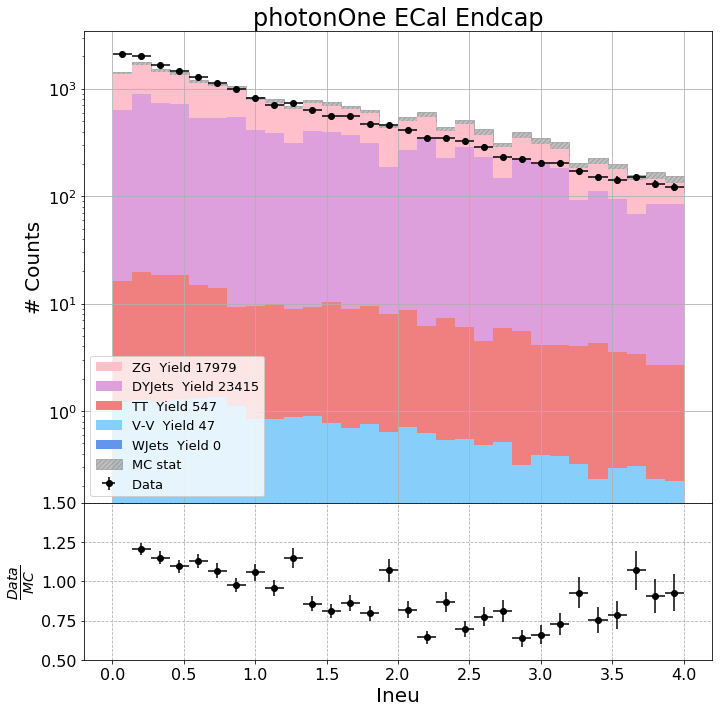

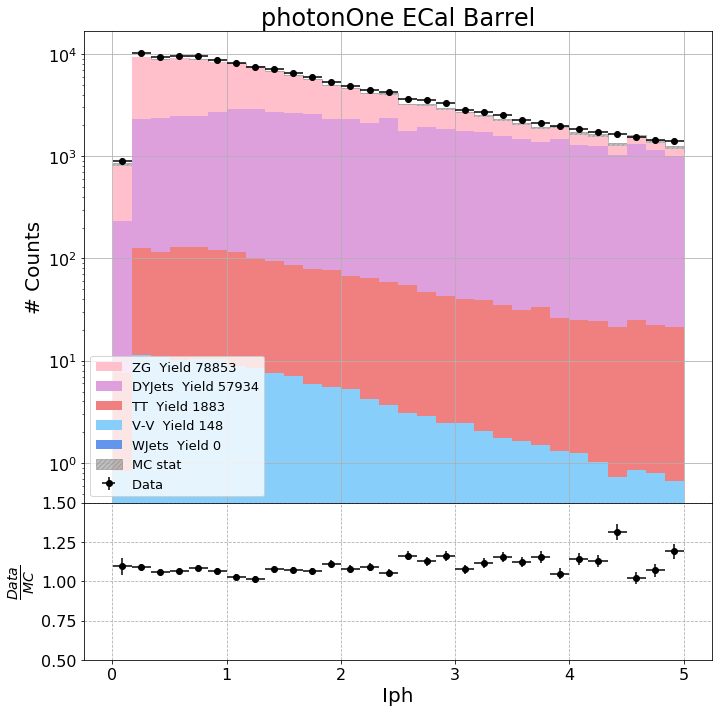

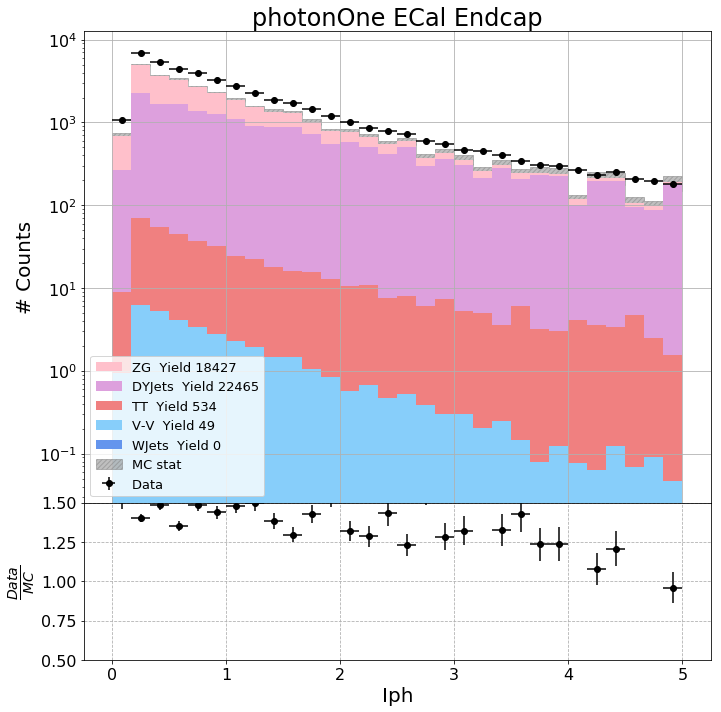

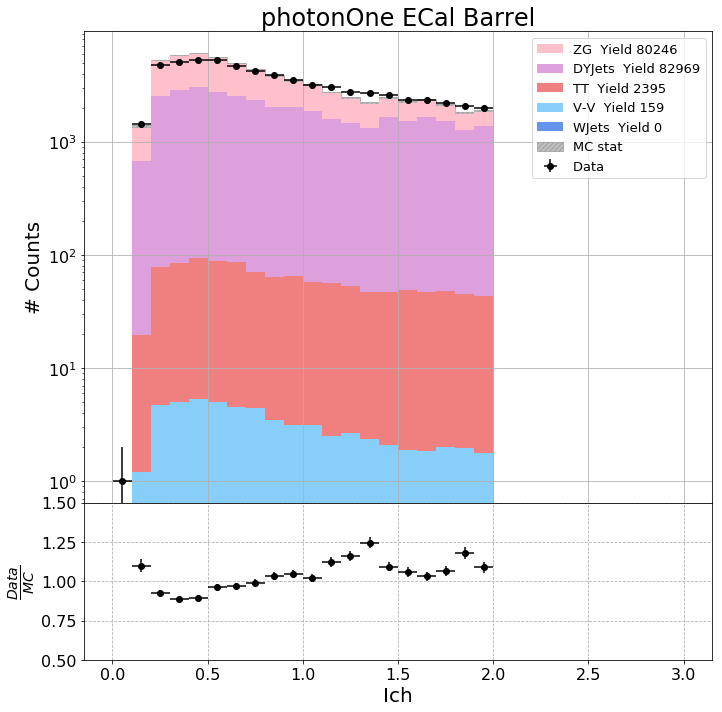

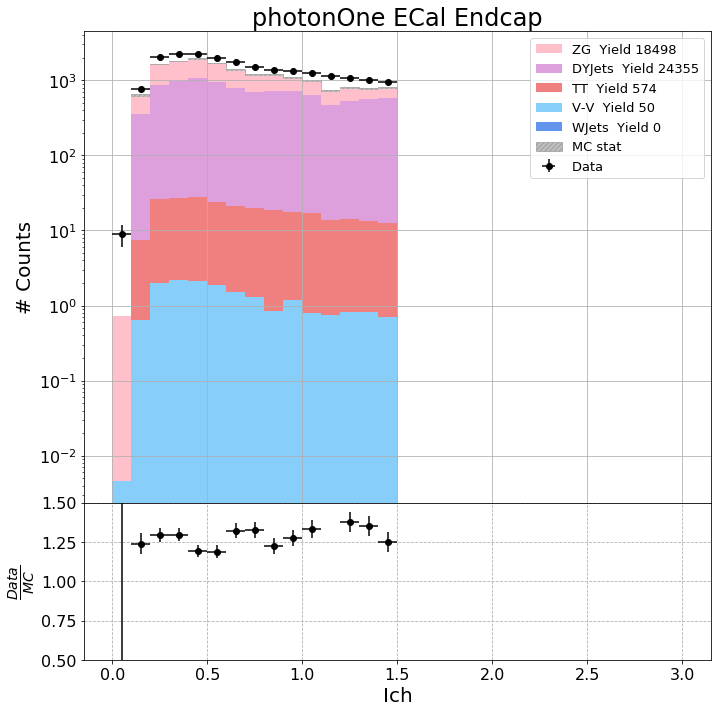

KeyError: 'ERes'

In [18]:
for log in [True,False]:
    for v in ['R9','HoverE',
              'Sieie','Sieip','Sipip','Srr',
              'E2x2','E5x5',
              'ScEtaWidth','ScPhiWidth',
              'ScRawE','PreShowerE','ScBrem',
              'Ineu','Iph','Ich',
              'ERes',]:
        for phType in ['EB','EE']:
            for p in ['photonOne_'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = False,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             index            = Region+'_'+phType+SampleSet,
                            );

In [ ]:
for log in [True,False]:
    for v in ['Sieie']:
        for phType in ['EB','EE']:
            for p in ['photonOne_'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = False,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             index            = Region+'_'+phType+SampleSet,
                            );

In [ ]:
for log in [True,False]:
    for v in ['Phi','Eta','Phi']:
        for phType in ['EB','EE']:
            for p in ['photonOne_'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = False,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             index            = Region+'_'+phType+SampleSet,
                            );

In [ ]:
for log in [True,False]:
    for v in ['DPhi','DEta','DR']:
        for phType in ['_EB','_EE']:
            for p in ['l1Photon'+phType,'l2Photon'+phType,'dilepton'+phType,'dileptonPhoton'+phType]:
                Plotter.Plot(
                             data,
                             var              = v,
                             part             = p,
                             signalInclude    = True,
                             stacked          = True,
                             density          = False,
                             log              = log,
                             weightCorrection = weightCorrection,
                             Plotting         = True,
                             Blind            = True,
                             StatInclude      = StatInclude,
                             CustomeRangeBins = [],
                             Print            = Print,
                             index            = Region+'_'+phType,
                            );

In [26]:
ranges,bins = Help.GET_RangeBins(
                      part='photonOne',
                      var= 'Pt',
                      ph = '_EE',
                      Blind    = True,
                      Plotting = False, 
                      File     = True,
                      )

Bins = np.array(Help.BinFormat(Bins=bins,ranges=ranges,Type='ranges'))
#Bins[Bins<150][:-1]
ranges

[15.0, 140.0]

In [13]:
phVars = {'':[],
          'EE':[],
          'EB':[],
         }

heatlabel = {'':[],
          'EE':[],
          'EB':[],
         }
for variable in data[-2].df.keys():
    if 'Eta' in variable and 'Sc' not in variable:
        continue
    if 'Phi' in variable and 'Sc' not in variable:
        continue
    if 'EE_EB' in variable:
        continue 
    if 'Pt' in variable:
        continue
    if 'ERes' in variable:
        continue
    if 'MVA' in variable:
        continue
        
        
    if 'photonOne' in variable:
        
        if 'EE' in variable:
            phType = 'EE'
        elif 'EB' in variable:
            if 'Srr' in variable or 'PreShower' in variable:
                continue
            phType = 'EB'
        else:
            phType = ''
            
        phVars[phType].append(variable)
        heatlabel[phType].append(variable.split('photonOne')[1])

In [17]:
DY = data[-3]

coef = {}
corr = []

phType = 'EB'
for i in np.arange(len(phVars[phType])):
    var1 = phVars[phType][i]
    coef[i] = {}
    corr.append([])
    for j in np.arange(len(phVars[phType])):
        var2 = phVars[phType][j]
        
        var1Vals = np.array(DY.GetWithCuts(var1))
        var2Vals = np.array(DY.GetWithCuts(var2))
        
        var1Vals = var1Vals[np.logical_not(np.isnan(var1Vals))]
        var2Vals = var2Vals[np.logical_not(np.isnan(var2Vals))]
        

        #print(var1,':',var2,np.correlate(var1Vals,var2Vals))
        mult = 10
        try:
            coef[i][j] = np.corrcoef(var1Vals,var2Vals)[0][1]
            corr[i].append(round(coef[i][j]*mult,2))
        except:
            coef[i][j] = mult
            corr[i].append(coef[i][j])
        print(var1,':',var2,coef[i][j])

photonOneR9_EB : photonOneR9_EB 1.0
photonOneR9_EB : photonOneSieie_EB -0.08920022364301157
photonOneR9_EB : photonOneHoverE_EB -0.0912210199798793
photonOneR9_EB : photonOneIneu_EB -0.05596771972671289
photonOneR9_EB : photonOneIph_EB -0.06751268238653269
photonOneR9_EB : photonOneIch_EB -0.025878911119300404
photonOneR9_EB : photonOneSieip_EB -0.0027561506056216134
photonOneR9_EB : photonOneSipip_EB -0.6594168103633808
photonOneR9_EB : photonOneE2x2_EB 0.30275564595128945
photonOneR9_EB : photonOneE5x5_EB 0.2617502249429318
photonOneR9_EB : photonOneScEtaWidth_EB -0.4026424611417922
photonOneR9_EB : photonOneScPhiWidth_EB -0.5919228784429243
photonOneR9_EB : photonOneScRawE_EB -0.10299538995872934
photonOneR9_EB : photonOneScBrem_EB -0.44780291320279075
photonOneSieie_EB : photonOneR9_EB -0.08920022364301157
photonOneSieie_EB : photonOneSieie_EB 1.0
photonOneSieie_EB : photonOneHoverE_EB 0.02105393816253872
photonOneSieie_EB : photonOneIneu_EB 0.0063768257570084655
photonOneSieie_EB 

photonOneScRawE_EB : photonOneE2x2_EB 0.8794356605473145
photonOneScRawE_EB : photonOneE5x5_EB 0.905771026447426
photonOneScRawE_EB : photonOneScEtaWidth_EB 0.11303570816522777
photonOneScRawE_EB : photonOneScPhiWidth_EB 0.0468476370971528
photonOneScRawE_EB : photonOneScRawE_EB 0.9999999999999998
photonOneScRawE_EB : photonOneScBrem_EB -0.03273973893821756
photonOneScBrem_EB : photonOneR9_EB -0.44780291320279075
photonOneScBrem_EB : photonOneSieie_EB -0.13435931432799791
photonOneScBrem_EB : photonOneHoverE_EB 0.042607705684301445
photonOneScBrem_EB : photonOneIneu_EB 0.01211213525819983
photonOneScBrem_EB : photonOneIph_EB 0.06813886239654422
photonOneScBrem_EB : photonOneIch_EB 0.0012582494983133091
photonOneScBrem_EB : photonOneSieip_EB 0.0015161126524082119
photonOneScBrem_EB : photonOneSipip_EB 0.23048880074963338
photonOneScBrem_EB : photonOneE2x2_EB -0.1779130383133654
photonOneScBrem_EB : photonOneE5x5_EB -0.1773220179976089
photonOneScBrem_EB : photonOneScEtaWidth_EB 0.016114

<Figure size 432x288 with 0 Axes>

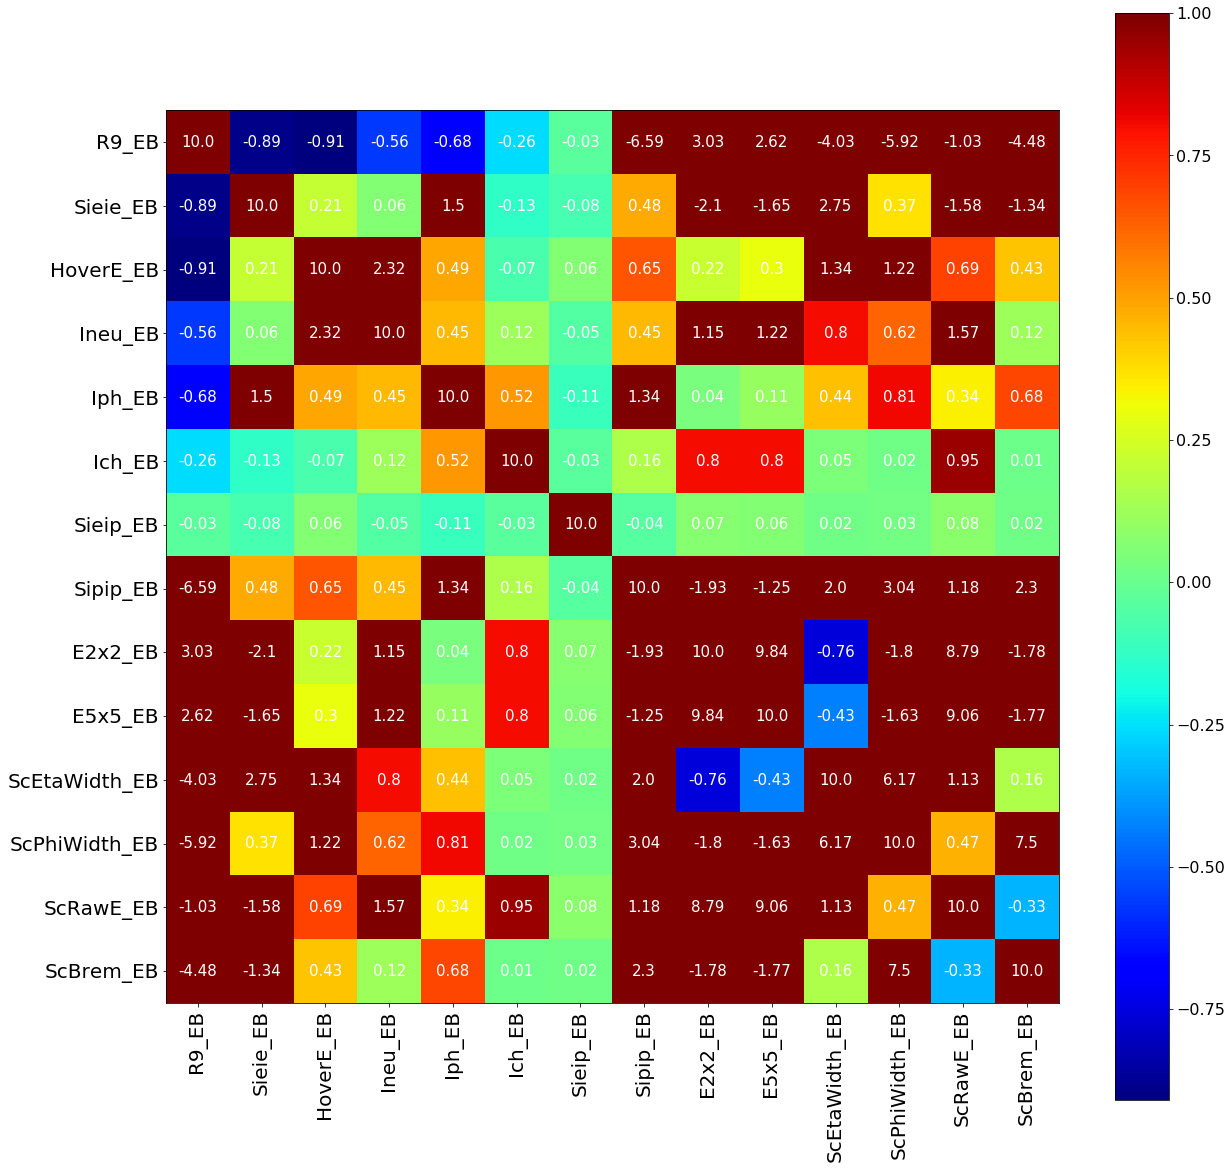

In [18]:
label = heatlabel[phType]

fig = plt.figure()
fig,ax = plt.subplots(figsize=(20,20))
ax = plt.gca()

ax.set_xticks(np.arange(len(label)))
ax.set_yticks(np.arange(len(label)))

for i in np.arange(len(phVars[phType])):
    for j in np.arange(len(phVars[phType])):
        ax.text(i,j,corr[i][j],ha='center',va='center',color = 'w',fontsize=15)

#im = ax.imshow(corr,cmap='jet')
thersh = 1
filterCorr = np.array(corr)
filterCorr[np.abs(filterCorr)<thersh] = np.array(filterCorr)[np.abs(filterCorr)<thersh]
filterCorr[np.abs(filterCorr)>=thersh] = thersh

im = ax.imshow(filterCorr,cmap='jet')
cbar = ax.figure.colorbar(im,ax=ax)

plt.xticks(rotation=90)
ax.set_xticklabels(label)
ax.set_yticklabels(label)
#ax.set_xtickslabel()
ax.tick_params(axis='both',labelsize=20)
ax.grid(False)

plt.show()

fig.savefig(figpath+"Photon_Correlation_"+phType+".png")

In [16]:
Min = np.argmin(np.abs(corr))
Dim = len(label)
xi  = int(Min/Dim)
yi  = Min - xi*Dim

var1,var2 = phVars[''][xi].split('photonOne')[1],phVars[''][yi].split('photonOne')[1]
print(var1,var2)

HoverE Ich


In [34]:
Min = np.logical_and(np.abs(corr)< 0.015, np.abs(corr) >  0.000 )
print(np.sum(Min))

2


In [19]:
def Hist2d(d,
           part1,var1,ph1,
           part2,var2,ph2,
           log,
           d2 = None,
           label = None,
          ):

    ranges,bins = {},{}
    wei = {}

    if log:
        logScale = col.LogNorm()
    else:
        logScale = None

    if not d2:
        d2 = d
    x = d.GetWithCuts(part1+var1+'')
    y = d2.GetWithCuts(part2+var2+'')
    
    
    ranges[var1],bins[var1] = Help.GET_RangeBins(part=part1,var=var1,ph='')
    ranges[var2],bins[var2] = Help.GET_RangeBins(part=part2,var=var2,ph='',Blind=False,Plotting=True,File =True)
    
    #ranges[var1] = [0.2,6.2]
    '''
    if ph2 == 'EB':
        ranges[var2] = [0.003,0.016]
    else:
        ranges[var2] = [0.016,0.05]
    '''
    
    #bins[var1] = np.arange(0.2,6,step=0.2)
    
    wei[var1] = d.GetWithCuts('weight')
    wei[var2] = d2.GetWithCuts('weight')

    ##############################

    if len(x) >len(y) :
        x = x[:len(y)]
    else:
        y = y[:len(x)]

    print('Corr:\n',np.corrcoef(x,y))
    fig = plt.figure(figsize=(10,8))
    
    #print(len(x),  len(y))
    #print(len(bins[var1]),  len(bins[var2]))
    #print(bins[var1],  bins[var2])
    
    plt.hist2d(x,y,
               bins    = [  bins[var1],  bins[var2]],
               range   = [ranges[var1],ranges[var2]],
               #weights = [   wei[var1],   wei[var2]],
               norm = logScale,
                );
    plt.title(label)
    plt.colorbar()
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()
    
    return fig,x,y

In [20]:
def Hist1d(d,part,var,ph):
    
    Val = d.GetWithCuts(part+var)
    
    plt.figure(figsize=(8,8))
    plt.hist(Val,
             histtype = 'step',
             
             )
    plt.xlabel(var)

In [21]:
import matplotlib.colors as col
log = True
#log = False

##########################

part1 = 'photonOne'
#var1 = 'Ich'
#ph1 = ''
ph1 = 'EB'
#ph1 = 'EE'

##########################
#part2 = 'dilepton'
#var2 = 'M'

part2 = 'photonOne'
#var2 = 'Sieip'
#ph2 = ''
ph2 = 'EB'
#ph2 = 'EE'
##########################

Hist1d(d=DY,part = part1,var = var1,ph = ph1)
Hist1d(d=DY,part = part2,var = var2,ph = ph2)

fig,x,y = Hist2d(d=DY,
                part1 = part1,var1 = var1,ph1 = ph1,
                part2 = part2,var2 = var2,ph2 = ph2,
                log   = log,
                label = DY.name,
                )
ZG = data[-2]
fig,x,y = Hist2d(d=ZG,
                part1 = part1,var1 = var1,ph1 = ph1,
                part2 = part2,var2 = var2,ph2 = ph2,
                log   = log,
                label = ZG.name,
                )

AttributeError: 'DataFrame' object has no attribute 'photonOnephotonOneScBrem_EB'

In [22]:
fig,x,y = Hist2d(d=DY,d2=ZG,
                part1 = part1,var1 = var1,ph1 = ph1,
                part2 = part1,var2 = var1,ph2 = ph1,
                log   = log,
                label = ZG.name + ' '+ DY.name,
                )

fig,x,y = Hist2d(d=DY,d2=ZG,
                part1 = part2,var1 = var2,ph1 = ph2,
                part2 = part2,var2 = var2,ph2 = ph2,
                log   = log,
                label = ZG.name + ' '+ DY.name,
                )

AttributeError: 'DataFrame' object has no attribute 'photonOnephotonOneScBrem_EB'

# Read ShowerShape Corrections

In [ ]:
corrPath = '/home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/ee/ShowerShapeCorrections/'

showershapeVar = [
                    'Phi','R9',
                    'Sieie','Sieip',
                    'E2x2','E5x5',
                    'Eta',
                    'ScRawE',
                    'ScEtaWidth','ScPhiWidth',
                    'PreShowerE','ScRawE',
                    'Srr',
                    'Rho'
                    ]


graph = {}
for ph in ['EE','EB']:
    graph[ph] = {}
    for ssV in showershapeVar:
        file = TFile(corrPath + 'trans_ShowerShape_'+ssV+'_'+ph+'.root')
        graph[ph][ssV] = file.Get('trans_'+ssV+'_'+ph)
    

In [ ]:
def ShowerShapeCorrection(Var,graph):
    for i in range(len(Var)):
        Var[i] = graph.Eval(Var[i])
    return Var

# BDT READ

In [ ]:
#path = "/eos/uscms/store/user/corderom/Corrections2016Rereco/"
phVals = ["EE","EB"]
#phVals = ["EE"]
#phVals = ["EB"]

path = ""
file = {}
reader = {}
for ph in phVals:
    if era == "2016":
        preName = "spring16_80x_"+ph
    elif era == "2017":
        preName = "fall17_94X_"+ph
    elif era == "2018":
        preName = "autumn18_"+ph
    file[ph] = pathMVA+preName+"_TMVAnalysis_BDT.weights.xml"
    reader[ph] = TMVA.Reader()


In [ ]:
varName     = {"EE":{
            "recoPhi"                :["photonOnePhi"],
            "r9"                     :["photonOneR9"],
            "sieieFull5x5"           :["photonOneSieie"],
            "sieipFull5x5"           :["photonOneSieip"],
            "e2x2Full5x5/e5x5Full5x5":["photonOneE2x2","photonOneE5x5"],
            "recoSCEta"              :["photonOneEta"],
            "rawE"                   :["photonOneScRawE"],
            "scEtaWidth"             :["photonOneScEtaWidth"],
            "scPhiWidth"             :["photonOneScPhiWidth"],
            "esEn/rawE"              :["photonOnePreShowerE","photonOneScRawE"],
            "esRR"                   :["photonOneSrr"],
            "rho"                    :["Rho"],
            },
          "EB":{
            "recoPhi"                :["photonOnePhi"],
            "r9"                     :["photonOneR9"],
            "sieieFull5x5"           :["photonOneSieie"],
            "sieipFull5x5"           :["photonOneSieip"],
            "e2x2Full5x5/e5x5Full5x5":["photonOneE2x2","photonOneE5x5"],
            "recoSCEta"              :["photonOneEta"],
            "rawE"                   :["photonOneScRawE"],
            "scEtaWidth"             :["photonOneScEtaWidth"],
            "scPhiWidth"             :["photonOneScPhiWidth"],
            "rho"                    :["Rho"],
            }
        }
varNaming   = {"EE":[
                "recoPhi"                ,
                "r9"                     ,
                "sieieFull5x5"           ,
                "sieipFull5x5"           ,
                "e2x2Full5x5/e5x5Full5x5",
                "recoSCEta"              ,
                "rawE"                   ,
                "scEtaWidth"             ,
                "scPhiWidth"             ,
                "esEn/rawE"              ,
                "esRR"                   ,
                "rho"                    ,
                ],
            "EB":[
                "recoPhi"                ,
                "r9"                     ,
                "sieieFull5x5"           ,
                "sieipFull5x5"           ,
                "e2x2Full5x5/e5x5Full5x5",
                "recoSCEta"              ,
                "rawE"                   ,
                "scEtaWidth"             ,
                "scPhiWidth"             ,
                "rho"                    ,
                ]
           }
myVarNaming = {"EE":[
                    ["photonOnePhi"],
                    ["photonOneR9"],
                    ["photonOneSieie"],
                    ["photonOneSieip"],
                    ["photonOneE2x2","photonOneE5x5"],
                    ["photonOneEta"],
                    ["photonOneScRawE"],
                    ["photonOneScEtaWidth"],
                    ["photonOneScPhiWidth"],
                    ["photonOnePreShowerE","photonOneScRawE"],
                    ["photonOneSrr"],
                    ["Rho"],
                    ],
            "EB": [["photonOnePhi"],
                    ["photonOneR9"],
                    ["photonOneSieie"],
                    ["photonOneSieip"],
                    ["photonOneE2x2","photonOneE5x5"],
                    ["photonOneEta"],
                    ["photonOneScRawE"],
                    ["photonOneScEtaWidth"],
                    ["photonOneScPhiWidth"],
                    ["photonOnePreShowerE","photonOneScRawE"],
                    ["photonOneSrr"],
                    ["Rho"],
                    ]
             }

ShowerShapeNaming = {"EE":[
                            ["Phi"],
                            ["R9"],
                            ["Sieie"],
                            ["Sieip"],
                            ["E2x2","E5x5"],
                            ["Eta"],
                            ["ScRawE"],
                            ["ScEtaWidth"],
                            ["ScPhiWidth"],
                            ["PreShowerE","ScRawE"],
                            ["Srr"],
                            ["Rho"],
                            ],
                    "EB": [
                            ["Phi"],
                            ["R9"],
                            ["Sieie"],
                            ["Sieip"],
                            ["E2x2","E5x5"],
                            ["Eta"],
                            ["ScRawE"],
                            ["ScEtaWidth"],
                            ["ScPhiWidth"],
                            ["PreShowerE","ScRawE"],
                            ["Srr"],
                            ["Rho"],
                            ],
                     }

In [ ]:
for d in data:
    print(d.name)
    print(  "Hard ",np.sum(d.df.genPhotonFHPFS),
            "Prompt ",np.sum(d.df.genPhotonIPFS),
            "R: ",np.sum(d.df.genPhotonIPFS)/len(d.df.genPhotonIPFS),
         )
    print()

In [ ]:
for d in data:
    print(d.name,len(d.df.runNumber),len(d.GetWithCuts('runNumber')))

In [ ]:
inMVA = {}
for ph in phVals:
    inMVA[ph] = {}
    for d in data:
        inMVA[ph][d.name] = {}

        print('---------------',d.name,'--------------')
        for i in np.arange(len(varNaming[ph])):
            if ShowerShapeCorrection:
                VARS = [ShowerShapeCorrection(Var = d.GetWithCuts(myVarNaming[ph][i][j]),  
                                              graph = graph[ph][ShowerShapeNaming[ph][i][j]] ) for j in range(len(myVarNaming[ph][i]))]
            else:
                VARS = [d.GetWithCuts(myVarNaming[ph][i][j]) for j in range(len(myVarNaming[ph][i]))]
            
            if d.name == 'WWTo2L2Nu':
                if varNaming[ph][i] == "recoPhi":
                    print(VARS[0])
            if len(VARS) >1:
                inMVA[ph][d.name][varNaming[ph][i]] = np.array(VARS[0])/np.array(VARS[1])
                M = VARS
            else:
                inMVA[ph][d.name][varNaming[ph][i]] = VARS[0]
            #print(varNaming[i],inMVA[d.name][varNaming[i]][0])


In [ ]:
file

In [ ]:
var = {}
for ph in phVals:
    var[ph] = {}
    for i in np.arange(len(varNaming[ph])):
            var[ph][varNaming[ph][i]] = array.array('f',[0])
            reader[ph].AddVariable(varNaming[ph][i], var[ph][varNaming[ph][i]])
    reader[ph].BookMVA("BDT",file[ph])        

In [ ]:
BDT = {}
for ph in phVals:
    print('============='+ph+"============")
    BDT[ph] = {}
    for d in data:
        print('--------',d.name,'-------',len(inMVA[ph][d.name]["recoPhi"]))
        BDT[ph][d.name] = []
        for i in range(len(inMVA[ph][d.name]["recoPhi"])):
            for v in inMVA[ph][d.name]:
                var[ph][v][0] = inMVA[ph][d.name][v][i]
                
            BDT[ph][d.name].append(reader[ph].EvaluateMVA("BDT"))



# Saving to Reduced CSV

In [ ]:
if ShowerShapeCorrection:
    ##################################################
    if type(Region) is not list and type(Region) is not np.ndarray:
        labelRegion = Region.replace(" ","")
    else:
        labelRegion = ''
        for r in Region:
            labelRegion += r.replace(" ","")
    ##################################################

    for d in data:
        print("---------"+d.name+"-----------")
        df = pd.DataFrame({name:d.GetWithCuts(name) for name in data[0].df.keys()})

        variable = 'weights'
        df[variable] = d.GetWithCuts(variable)

        df["ShowerShapeMVA_EE"] = BDT['EE'][d.name]
        df["ShowerShapeMVA_EB"] = BDT['EB'][d.name]

        df.to_csv(pathSelections+'/'+d.name+'_'+labelRegion+'.csv')
else:
    print('ShowerShape Corrections are not applied and therefore files not saved')

# ------------- PLOTS

In [ ]:
bins  = np.arange(-1,1.1,step=0.1)

bdt = {}
for phType in ['EB','EE']:
    bdt[phType] = []
    
    Cut.PhaseSpace(
                data,
                phType = '',
                Charge = Charge,
                Region = 'Sig',
                Print  = Print,
                MVA    = MVA,
              ) 
    
    for d,i in zip(data,range(len(data))):
        if not d.df.empty and d.name != 'DoubleMuon_2017':
            d.AddCuts(np.array(d.df.nPU) > 0)
        
        if phType == 'EB':
            Ind = np.abs(d.GetWithCuts('photonOneEta') < 1.4442)
        else:
            Ind = np.logical_and(np.abs(d.GetWithCuts('photonOneEta')) > 1.5666,
                                 np.abs(d.GetWithCuts('photonOneEta')) <= 2.5
                                )

        
        if len(BDT[phType][d.name]) != 0:
            bdtH,x = np.histogram(np.array(BDT[phType][d.name])[Ind],
                                 bins    = bins,
                                 weights = data[i].GetWithCuts('weights')[Ind]
                                )
        else:
            bdtH = np.zeros(len(bins)-1)
        bdt[phType].append(bdtH)

In [ ]:
Name = [d.name for d in data]


In [ ]:
for log in [True,False]:
    for phType in ['EB','EE']:
        Plotter.Plot_Bin(
                         VAR = bdt[phType], wei=bdt,
                         label = Name, colors = colors,
                         ranges           = [-1,1], 
                         bins             = bins,
                         var              = 'ShowerShapeMVA',
                         part             =  '',
                         signalInclude    = True,
                         stacked          = True,
                         density          = False,
                         log              = log,
                         Plotting         = True,
                         Blind            = True,
                         StatInclude      = False,
                         index            = phType,
                        );

# -----------------------------------------------------

# Openning file test 

In [ ]:
if type(Region) is not list or type(Region) is not np.nbarray:
    labelRegion = Region.replace(" ","")
else:
    labelRegion = ''
    for r in Region:
        labelRegion += r.replace(" ","")

reduced = []
for d in data:
    print('-----'+d.name+'--------')
    reduced.append(pd.read_csv(pathSelections+'/'+d.name+'_'+labelRegion+'.csv'))


# -----------------------------------------------------

In [ ]:
ph = 'EE'
d = DYJets
for i in range(len(ShowerShapeNaming[ph])):
    plt.figure()
    
    if varNaming[ph][i] == "e2x2Full5x5/e5x5Full5x5":
        ranges = [0,1.3]
        
        plt.hist(inMVA[ph]['DYJets'][varNaming[ph][i]],
                 histtype = 'step',
                 bins = 30,
                 range = ranges,
                )
        
        T = []
        for t in inMVA[ph]['DYJets'][varNaming[ph][i]]:
            T.append(graph[ph]['E2x2'].Eval(t)/graph[ph]['E5x5'].Eval(t))
        plt.hist(T,
                 histtype = 'step',
                 bins = 30,
                 range = ranges,
                )     
    elif varNaming[ph][i] == "esEn/rawE":
        ranges = [0,0.2]
        plt.hist(inMVA[ph]['DYJets'][varNaming[ph][i]],
                 histtype = 'step',
                 bins = 10,
                 range = ranges,
                )
        
        T = []
        for t in inMVA[ph]['DYJets'][varNaming[ph][i]]:
            T.append(graph[ph]['PreShowerE'].Eval(t)/graph[ph]['ScRawE'].Eval(t))
        plt.hist(T,
                 histtype = 'step',
                 bins = 10,
                 range = ranges,
                )     
    else:
        plt.hist(inMVA[ph]['DYJets'][varNaming[ph][i]],
             histtype = 'step',
             bins = 30,
            )
        
        
        T = []
        ssV = ShowerShapeNaming[ph][i][0]
        if ssV == "Rho":
            p = ''
        else:
            p = 'photonOne'
        
        print(ssV,varNaming[ph][i])
        for t in d.GetWithCuts(p+ssV):
            T.append(graph[ph][ssV].Eval(t))
        plt.hist(T,
                 histtype = 'step',
                 bins = 30,
                 label = 'Corr'
                )
        
    plt.xlabel(varNaming[ph][i])
    plt.legend()

In [ ]:
d = data[-2]
plt.figure()
plt.hist(d.GetWithCuts('photonOneE2x2'),
         bins = 30,
         range = [0,300]
        );

plt.figure()
plt.hist(d.GetWithCuts('photonOneE5x5'),
         bins = 30,
         range = [0,300]
        );

plt.figure()
plt.hist(np.array(d.GetWithCuts('photonOneE2x2'))/np.array(d.GetWithCuts('photonOneE5x5')),
         bins = 30,
         #range = [-1,300]
        );

In [ ]:
d = data[-2]
plt.figure()
plt.hist(d.GetWithCuts('photonOnePreShowerE'),
         bins = 20,
         range = [0,20]
        );

plt.figure()
plt.hist(d.GetWithCuts('photonOneScRawE'),
         bins = 30,
         range = [0,300]
        );

plt.figure()
plt.hist(np.array(d.GetWithCuts('photonOnePreShowerE'))/np.array(d.GetWithCuts('photonOneScRawE')),
         bins = 30,
         range = [0,0.3]
        );

In [ ]:
d.df.photonOnePreShowerE

In [ ]:
plt.hist(BDT['EB']['DYJets'],
         bins = np.arange(-1,1.1,step=0.1)
        );